In [2]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import warnings
import statsmodels.formula.api as smf
#import ptitprince as pt
import researchpy as rp
import numpy as np
from sklearn.linear_model import BayesianRidge, PoissonRegressor
from sklearn.linear_model import LinearRegression

warnings.filterwarnings("ignore")


In [3]:
df= pd.read_csv("mastitis_machine_learning.csv")

In [4]:
df=df.dropna(subset=['cfu/ml'])

In [5]:
df['SCC'].describe()

count     776.000000
mean     1319.472938
std      2459.096811
min         1.000000
25%        46.000000
50%       265.000000
75%       994.250000
max      9999.000000
Name: SCC, dtype: float64

In [6]:
df= df.dropna(subset=['cfu/ml'])
df['cfu/ml']= df['cfu/ml'].astype(str).replace({',':''})
df['cfu/ml'] = pd.to_numeric(df['cfu/ml'], errors='coerce')
df = df.dropna(subset=['cfu/ml'])
df['cfu/ml'] = df['cfu/ml'].astype(int)
df['logcfu']= df['cfu/ml'].apply(lambda x:  np.log10(x+1))

In [7]:
df_scc= df[df['subclinical']==1]

In [8]:
df['new_subclinical'] = df['SCC'].apply(lambda x: 1 if x > 2000 else 0)

In [9]:
df['new_subclinical'].value_counts()

new_subclinical
0    637
1    139
Name: count, dtype: int64

In [10]:

rp.summary_cont(df.groupby('subclinical')['logcfu'])

,N,Mean,SD,SE,95% Conf.,Interval
subclinical,,,,,,
0,377,3.1045,0.7609,0.0392,3.0274,3.1815
1,399,3.3836,0.6826,0.0342,3.3164,3.4508


In [11]:
def get_results(df, target, test_features, model):
    df = df.fillna(method='ffill')
    X = df[test_features]
    y = df[target]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    
    r2 = r2_score(y_test, y_pred)

    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10))
    ax1.plot(X_test, y_test, 'o', color='blue', label='test data')
    ax1.plot(X_test, y_pred, 'o', color='red', label='predicted data')
    ax1.set_title('Random Forest Regression Results for the prediction SCC from milk and thermal imaging variables')
    ax1.set_ylabel('log of somatic cell count')
    ax1.set_xticklabels([])
    ax1.set_xlabel('')
    import matplotlib.lines as mlines
    test_data_handle = mlines.Line2D([], [], color='blue', marker='o', linestyle='None', markersize=8, label='Test Data')
    predicted_data_handle = mlines.Line2D([], [], color='red', marker='o', linestyle='None', markersize=8, label='Predicted Data')

    ax1.legend(handles=[test_data_handle, predicted_data_handle], loc='upper right')
    #ax1.text(0.90, 0.03, f'r squared: {r2:.2f}', ha='center', va='center', transform= ax.transAxes)



    if hasattr(model, 'feature_importances_'):
        important_features_dict = {}
        for feature, importance in zip(X.columns, model.feature_importances_):
            important_features_dict[feature] = importance

        sorted_features = dict(sorted(important_features_dict.items(), key=lambda x: x[1], reverse=True))

        # Creating a DataFrame for plotting
        df_plot = pd.DataFrame(sorted_features, index=[1]).T

        # Plotting in descending order
        ax2.bar(df_plot.index, df_plot[1], color='green')
        ax2.set_title('Feature Importances (Descending Order)')
        ax2.set_xlabel('Features')
        ax2.set_ylabel('Importance')

        plt.tight_layout()
        plt.show()

    else:

        print(f'mean_squared_error is {mse}, r squared is {r2}, and score is {model.score(X_test, y_test)}')

    return mse, r2


In [ ]:

model_test=[RandomForestRegressor(n_estimators=100, random_state=42), BayesianRidge(), LinearRegression()]
model_test_name=['RandomForestRegressor','BayesianRidge', 'LinearRegression']
Only_sq= ['Maxsq', 'Minsq', 'Avgesq']
Only_poly=['Maxpoly', 'Minpoly','Avgepoly']

Milk_features=['Fat', 'Protein','Lactose', 'SNF', 'MUN',  'BHB', 'Acetone']

Temp_features= ['Maxsq', 'Minsq','Avgesq','Maxpoly', 'Minpoly','Avgepoly']

all_features=['Fat', 'Protein','Lactose', 'SNF', 'MUN',  'BHB', 'Acetone', 'Maxsq', 'Minsq','Avgesq','Maxpoly', 'Minpoly','Avgepoly']
list_model=[Only_sq, Only_poly, Milk_features, Temp_features, all_features]
list_model_names=['Only_sq', 'Only_poly', 'Milk_features', 'Temp_features', 'all_features']
MSE=[]
R2=[]
algo_name=[]
model_name=[]

for model, algo_nam in zip(model_test,model_test_name) :
    for features, names  in zip(list_model, list_model_names):
        mse, r2= get_results(df, ['logscc'], features, model)
        MSE.append(mse)
        R2.append(r2)
        algo_name.append(algo_nam)
        model_name.append(names)

    
    

In [3]:
import os
os.getcwd()
#os.mkdir('c:\\Users\\PaudyalAdmin\\Desktop\\nmc')
#os.chdir('c:\\Users\\PaudyalAdmin\\Desktop\\nmc')

'c:\\Users\\rajes\\Desktop\\nmc_files'

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd

def get_results(df, target, test_features, model):
    df = df.fillna(method='ffill')
    X = df[test_features]
    y = df[target]
    
    # Splitting the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Model fitting and prediction
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Classification metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Plotting
    fig, ax1 = plt.subplots(1, 1, figsize=(10, 6))
    ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, ax=ax1, cmap="Blues")
    ax1.set_title('Confusion Matrix')
    
    plt.tight_layout()
    plt.show()

    # Feature importance if applicable
    if hasattr(model, 'feature_importances_'):
        important_features_dict = {}
        for feature, importance in zip(X.columns, model.feature_importances_):
            important_features_dict[feature] = importance

        sorted_features = dict(sorted(important_features_dict.items(), key=lambda x: x[1], reverse=True))

        # Creating a DataFrame for plotting
        df_plot = pd.DataFrame(sorted_features, index=[1]).T

        # Plotting in descending order
        plt.figure(figsize=(10, 6))
        plt.bar(df_plot.index, df_plot[1], color='green')
        plt.title('Feature Importances (Descending Order)')
        plt.xlabel('Features')
        plt.ylabel('Importance')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

    print(f"Accuracy: {accuracy:.2f}, Precision: {precision:.2f}, Recall: {recall:.2f}, F1 Score: {f1:.2f}")

    return accuracy, f1, model

# Models and feature lists
model_test = [RandomForestClassifier(n_estimators=100, random_state=42), LogisticRegression(max_iter=1000), SVC()]
model_test_name = ['RandomForestClassifier', 'LogisticRegression', 'SVC']

Only_sq = ['Maxsq', 'Minsq', 'Avgesq', 'sq_delta']
Only_poly = ['Maxpoly', 'Minpoly', 'Avgepoly', 'poly_delta']

Milk_features = ['Fat', 'Protein', 'Lactose', 'SNF', 'MUN', 'BHB', 'Acetone']
Temp_features = ['Maxsq', 'Minsq', 'Avgesq', 'Maxpoly', 'Minpoly', 'Avgepoly']

all_features = ['Fat', 'Protein', 'Lactose', 'SNF', 'MUN', 'BHB', 'Acetone', 'Maxsq', 'Minsq', 'Avgesq', 'Maxpoly', 'Minpoly', 'Avgepoly']
list_model = [Only_sq, Only_poly, Milk_features, Temp_features, all_features]
list_model_names = ['Only_sq', 'Only_poly', 'Milk_features', 'Temp_features', 'all_features']

# Metrics storage
ACCURACY = []
F1 = []
algo_name = []
model_name = []

# Iterating over models and feature sets
for model, algo_nam in zip(model_test, model_test_name):
    for features, names in zip(list_model, list_model_names):
        accuracy, f1, model = get_results(df, 'subclinical', features, model)
        ACCURACY.append(accuracy)
        F1.append(f1)
        algo_name.append(algo_nam)
        model_name.append(names)


In [ ]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
import os

# Ensure output folders exist
os.makedirs("confusion_matrices", exist_ok=True)
os.makedirs("feature_importances", exist_ok=True)

def get_results(df, target, test_features, model, algo_name, feature_name):
    df = df.fillna(method='ffill')
    X = df[test_features]
    y = df[target]
    
    # Splitting the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Model fitting and prediction
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Classification metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)

    # Save confusion matrix
    fig, ax1 = plt.subplots(1, 1, figsize=(8, 6))
    ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, ax=ax1, cmap="Blues")
    ax1.set_title(f'{algo_name} - {feature_name}')
    plt.tight_layout()
    fig_path = f"confusion_matrices/{algo_name}_{feature_name}.png"
    plt.savefig(fig_path)
    plt.close()

    # Save feature importances if applicable
    if hasattr(model, 'feature_importances_'):
        important_features = pd.Series(model.feature_importances_, index=test_features).sort_values(ascending=False)
        plt.figure(figsize=(10, 6))
        important_features.plot(kind='bar', color='green')
        plt.title(f'Feature Importances - {algo_name} ({feature_name})')
        plt.ylabel('Importance')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.savefig(f'feature_importances/{algo_name}_{feature_name}_importance.png')
        plt.close()

    return {
        'Algorithm': algo_name,
        'Features Used': feature_name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    }

# Models and features
model_test = [
    RandomForestClassifier(n_estimators=100, random_state=42),
    LogisticRegression(max_iter=1000),
    AdaBoostClassifier(n_estimators=100, random_state=42)
]
model_test_name = ['RandomForestClassifier', 'LogisticRegression', 'AdaBoostClassifier']

Only_sq = ['Maxsq', 'Minsq', 'Avgesq']
Only_poly = ['Maxpoly', 'Minpoly', 'Avgepoly']
Milk_features = ['Fat', 'Protein', 'Lactose', 'SNF', 'MUN', 'BHB', 'Acetone']
Temp_features = Only_sq + Only_poly
all_features = Milk_features + Temp_features

list_model = [Only_sq, Only_poly, Milk_features, Temp_features, all_features]
list_model_names = ['Only_sq', 'Only_poly', 'Milk_features', 'Temp_features', 'all_features']

# Collecting all results
results = []

# Loop through each model and feature set
for model, algo_nam in zip(model_test, model_test_name):
    for features, feature_name in zip(list_model, list_model_names):
        res = get_results(df, 'subclinical', features, model, algo_nam, feature_name)
        results.append(res)

# Create summary DataFrame
results_df = pd.DataFrame(results)
print("\nModel Evaluation Summary:")
print(results_df)

# Save to CSV
results_df.to_csv("model_metrics_summary.csv", index=False)

# Identify and report best performing model based on F1 score
best_model = results_df.loc[results_df['F1 Score'].idxmax()]
print(f"\nBest Model:\n{best_model}")


In [37]:
df

,Unnamed: 0,Isolate_1,Isolate_2,Isolate_3,Isolate_4,Colony Count,cfu/ml,value,Day,ID,...,merged_ID,bac_type,gram_sp,logcfu,sq_delta,poly_delta,new_subclinical,Temp_max,Temp_min,Temp_avg
0,0,Staphylococcus chromogenes,Streptococcus sp. Alpha-Hemolytic,NaN,NaN,Colony Count: 300 CFU/ml,300,NaN,410,37206,...,37206.0LTLF,Environmental,Positive,2.478566,3.4,3.4,0,33.3,29.5,32.25
1,1,Staphylococcus chromogenes,Streptococcus sp. Alpha-Hemolytic,NaN,NaN,Colony Count: 300 CFU/ml,300,NaN,410,37206,...,37206.0LTLR,Environmental,Positive,2.478566,0.8,0.8,1,35.6,30.1,33.88
2,2,Staphylococcus chromogenes,Streptococcus sp. Alpha-Hemolytic,NaN,NaN,Colony Count: 300 CFU/ml,300,NaN,410,37206,...,37206.0LTRR,Environmental,Positive,2.478566,1.8,1.8,0,34.8,30.5,33.13
3,3,Staphylococcus chromogenes,Gram Positive Coccus,NaN,NaN,"Colony Count: > 10,000 colony forming units/mL.",10000,NaN,425,37206,...,37206.0LTLF,Environmental,Positive,4.000043,3.6,3.6,0,34.7,31.7,33.30
4,4,Staphylococcus chromogenes,Gram Positive Coccus,NaN,NaN,"Colony Count: > 10,000 colony forming units/mL.",10000,NaN,425,37206,...,37206.0LTLR,Environmental,Positive,4.000043,2.4,2.4,1,34.7,32.3,33.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
771,852,Staphylococcus aureus,Streptococcus equisimilis,Streptococcus sp. Alpha-Hemolytic,NaN,Colony Count: 8000 CFU/ml,8000,NaN,425,94447,...,94447.0LTRR,Contagious,Positive,3.903144,1.7,1.7,1,33.4,32.0,32.60
772,853,Staphylococcus aureus,Staphylococcus chromogenes,NaN,NaN,"Colony Count: 4,100 CFU/ml",4100,NaN,310,99809,...,99809.0TLF,Contagious,Positive,3.612890,0.8,0.8,1,34.0,31.0,32.59
773,854,Staphylococcus aureus,Staphylococcus chromogenes,NaN,NaN,"Colony Count: 4,100 CFU/ml",4100,NaN,310,99809,...,99809.0TLR,Contagious,Positive,3.612890,0.7,0.7,1,34.6,31.5,33.39
774,855,Staphylococcus aureus,Staphylococcus chromogenes,NaN,NaN,"Colony Count: 4,100 CFU/ml",4100,NaN,310,99809,...,99809.0TRF,Contagious,Positive,3.612890,0.4,0.4,0,35.4,31.1,34.60


In [11]:

list_df=[]

for id, data_id in df.groupby('ID'):
    for day, data_day in data_id.groupby('Day'):
        if len(data_day) >= 1:

            temp_poly_max_max= data_day['Maxpoly'].max()
            temp_poly_max_min= data_day['Maxpoly'].min()
            temp_poly_min_max= data_day['Minpoly'].max()
            temp_poly_min_min= data_day['Minpoly'].min() 
            temp_poly_avge_max= data_day['Avgepoly'].max() 
            temp_poly_avge_min= data_day['Avgepoly'].min()
            temp_poly_avge= data_day['Avgepoly'].mean()
            temp_max_dev= temp_poly_max_max-temp_poly_max_min
            temp_min_dev= temp_poly_min_max-temp_poly_min_min
            temp_avge_dev= temp_poly_avge_max-temp_poly_avge_min

            for qtr, data_qtr in data_day.groupby('Qtr'):
                data_temp_only={}
                if len(data_qtr) >= 1:
                    temp_max_dev= temp_poly_max_max - data_qtr['Maxpoly'].iloc[0]
                    temp_min_dev= temp_poly_min_max-data_qtr['Minpoly'].iloc[0]
                    temp_max_min_dev= temp_poly_max_max- data_qtr['Maxpoly'].iloc[0]
                    temp_avge_dev= temp_poly_avge- data_qtr['Avgepoly'].iloc[0]



                



                    data_temp_only['id']= id
                    data_temp_only['day']= day 
                    data_temp_only['qtr']= qtr
                    data_temp_only['temp_max_dev']= temp_max_dev
                    data_temp_only['temp_min_dev']= temp_min_dev
                    data_temp_only['temp_avge_dev']= temp_avge_dev
                    data_temp_only['temp_max_min_dev']= temp_max_min_dev
                    data_temp_only['new_subclinical']= data_qtr['new_subclinical'].iloc[0]
                    data_temp_only['SCC']= data_qtr['SCC'].iloc[0]
                    data_temp_only['subclinical']= data_qtr['subclinical'].iloc[0]
                    data_temp_only['logcfu']= data_qtr['logcfu'].iloc[0]
                    data_temp_only['Maxpoly']= data_qtr['Maxpoly'].iloc[0]
                    data_temp_only['Minpoly']= data_qtr['Minpoly'].iloc[0]
                    data_temp_only['Avgepoly']= data_qtr['Avgepoly'].iloc[0]

                    data_temp_only['Fat']= data_qtr['Fat'].iloc[0]
                    data_temp_only['Protein']= data_qtr['Protein'].iloc[0]  
                    data_temp_only['Lactose']= data_qtr['Lactose'].iloc[0]
                    data_temp_only['SNF']= data_qtr['SNF'].iloc[0]
                    data_temp_only['MUN']= data_qtr['MUN'].iloc[0]
                    data_temp_only['BHB']= data_qtr['BHB'].iloc[0]
                    data_temp_only['Acetone']= data_qtr['Acetone'].iloc[0]  
                list_df.append(data_temp_only)


 
                
                



                   


                


In [12]:
list_df=pd.DataFrame(list_df)

In [13]:
list_df

,id,day,qtr,temp_max_dev,temp_min_dev,temp_avge_dev,temp_max_min_dev,new_subclinical,SCC,subclinical,...,Maxpoly,Minpoly,Avgepoly,Fat,Protein,Lactose,SNF,MUN,BHB,Acetone
0,37206,410,LF,2.3,1.0,0.836667,2.3,0,489,1,...,33.3,29.5,32.25,1.88,3.51,4.81,9.18,12.55310,-0.26,0.02
1,37206,410,LR,0.0,0.4,-0.793333,0.0,1,7265,1,...,35.6,30.1,33.88,1.76,3.59,4.13,8.50,10.39638,-0.36,0.03
2,37206,410,RR,0.8,0.0,-0.043333,0.8,0,493,1,...,34.8,30.5,33.13,1.85,3.47,4.82,9.15,13.47697,-0.19,0.03
3,37206,425,LF,0.4,1.0,0.166667,0.4,0,700,1,...,34.7,31.7,33.30,2.70,4.40,4.44,9.62,17.74372,0.05,0.12
4,37206,425,LR,0.4,0.4,0.166667,0.4,1,5739,1,...,34.7,32.3,33.30,1.89,4.48,4.03,9.24,16.04166,-0.24,0.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
771,94447,425,RR,0.7,0.0,0.050000,0.7,1,5516,1,...,33.4,32.0,32.60,1.77,3.24,2.89,6.82,24.11153,-0.12,-0.01
772,99809,310,LF,1.4,0.8,0.952500,1.4,1,4878,1,...,34.0,31.0,32.59,0.77,2.62,2.79,6.15,18.91777,0.00,-0.11
773,99809,310,LR,0.8,0.3,0.152500,0.8,1,2022,1,...,34.6,31.5,33.39,0.81,2.70,4.11,7.67,17.65323,0.43,0.01
774,99809,310,RF,0.0,0.7,-1.057500,0.0,0,5,0,...,35.4,31.1,34.60,1.04,2.59,4.54,8.04,18.26772,0.63,0.03


In [14]:
df['Temp_max']= df['Maxpoly']
df['Temp_min']= df['Minpoly']
df['Temp_avg']= df['Avgepoly']

In [86]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, roc_auc_score, ConfusionMatrixDisplay
)
from sklearn.model_selection import GridSearchCV, StratifiedKFold
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

# Ensure output folders exist
os.makedirs("confusion_matrices_poly", exist_ok=True)
os.makedirs("feature_importances_poly", exist_ok=True)

def calculate_specificity(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    TN = cm[0, 0]
    FP = cm[0, 1]
    return TN / (TN + FP) if (TN + FP) > 0 else 0

def get_results(df, target, test_features, model, param_grid, algo_name, feature_name):
    df = df.fillna(method='ffill')
    X = df[test_features]
    y = df[target]

    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    grid = GridSearchCV(model, param_grid, cv=cv, scoring='f1_weighted', n_jobs=-1)
    grid.fit(X, y)
    best_model = grid.best_estimator_

    metrics = {
        'Accuracy': [],
        'Precision': [],
        'Recall': [],
        'F1 Score': [],
        'ROC-AUC': [],
        'Specificity': []
    }

    for train_idx, test_idx in cv.split(X, y):
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

        best_model.fit(X_train, y_train)
        y_pred = best_model.predict(X_test)
        y_prob = best_model.predict_proba(X_test)[:, 1] if hasattr(best_model, "predict_proba") else None

        metrics['Accuracy'].append(accuracy_score(y_test, y_pred))
        metrics['Precision'].append(precision_score(y_test, y_pred, average='weighted', zero_division=0))
        metrics['Recall'].append(recall_score(y_test, y_pred, average='weighted', zero_division=0))
        metrics['F1 Score'].append(f1_score(y_test, y_pred, average='weighted', zero_division=0))
        if y_prob is not None and len(np.unique(y)) == 2:
            metrics['ROC-AUC'].append(roc_auc_score(y_test, y_prob))
        else:
            metrics['ROC-AUC'].append(np.nan)
        metrics['Specificity'].append(calculate_specificity(y_test, y_pred))

    # Final fit for confusion matrix and feature importance
    best_model.fit(X, y)
    y_pred_final = best_model.predict(X)

    fig, ax1 = plt.subplots(1, 1, figsize=(8, 6))
    ConfusionMatrixDisplay.from_estimator(best_model, X, y, ax=ax1, cmap="Blues")
    ax1.set_title(f'{algo_name} - {feature_name}')
    plt.tight_layout()
    plt.savefig(f"confusion_matrices_poly/{algo_name}_{feature_name}.png")
    plt.close()

    if hasattr(best_model, 'feature_importances_'):
        important_features = pd.Series(best_model.feature_importances_, index=test_features).sort_values(ascending=False)
        plt.figure(figsize=(10, 6))
        important_features.plot(kind='bar', color='green')
        plt.title(f'Feature Importances - {algo_name} ({feature_name})')
        plt.ylabel('Importance')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.savefig(f'feature_importances_poly/{algo_name}_{feature_name}_importance.png')
        plt.close()

    summary = {
        'Algorithm': algo_name,
        'Features Used': feature_name,
        'Best Parameters': grid.best_params_,
    }

    for k in metrics:
        mean_val = np.mean(metrics[k])
        se_val = np.std(metrics[k])
        summary[f"{k} (±SE)"] = f"{mean_val:.2f} ± {se_val:.2f}"

    return summary


# Model configs
model_configs = [
    (RandomForestClassifier(random_state=42), {
        'n_estimators': [50, 100, 150, 200],
        'max_depth': [None, 10, 20, 50, 100]
    }, 'RandomForestClassifier'),
    (LogisticRegression(max_iter=1000), {
        'C': [0.1, 1, 10, 100],
        'solver': ['lbfgs', 'sag', 'liblinear', 'newton-cg']
    }, 'LogisticRegression'),
    (AdaBoostClassifier(random_state=42), {
        'n_estimators': [50, 100, 150, 200],
        'learning_rate': [0.5, 1.0, 1.5,2]
    }, 'AdaBoostClassifier'),
    (GaussianNB(), {
        'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6]
    }, 'NaiveBayes')
]



Milk_features = ['Fat', 'Protein', 'Lactose', 'SNF', 'MUN', 'BHB', 'Acetone']
poly_max=['Temp_max']
poly_min=['Temp_min']

#poly_min=['Minpoly']
poly_avg=['Avgepoly']
milk_max_poly= Milk_features+ poly_max
milk_min_poly= Milk_features+ poly_min
milk_avg_poly= Milk_features+ poly_max
Temp_features=['Temp_max', 'Temp_min', 'Temp_avg']


list_model = [  Milk_features, milk_max_poly, milk_min_poly, poly_max, poly_min, Temp_features]
list_model_names = ['Milk_features', 'Combo_Max', 'Combo_Min', 'Temp_Max', 'Temp_min', 'Temp_features']

results = []
for model, params, model_name in model_configs:
    for features, feature_name in zip(list_model, list_model_names):
        result = get_results(list_df, 'new_subclinical', features, model, params, model_name, feature_name)
        results.append(result)

results_df = pd.DataFrame(results)
results_df.to_csv("model_metrics_summary.csv", index=False)

print("\nModel Evaluation Summary:")
print(results_df)


PermissionError: [Errno 13] Permission denied: 'model_metrics_summary.csv'

In [15]:
list_df['Temp_max']= list_df['Maxpoly']
list_df['Temp_min']= list_df['Minpoly']
list_df['Temp_avg']= list_df['Avgepoly']

In [13]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, roc_auc_score, ConfusionMatrixDisplay
)
from sklearn.model_selection import GridSearchCV, StratifiedKFold
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

# Ensure output folders exist
os.makedirs("confusion_matrices_poly", exist_ok=True)
os.makedirs("feature_importances_poly", exist_ok=True)

def calculate_specificity(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    TN = cm[0, 0]
    FP = cm[0, 1]
    return TN / (TN + FP) if (TN + FP) > 0 else 0

from sklearn.model_selection import train_test_split

from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, ConfusionMatrixDisplay
)
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def get_results(df, target, test_features, model, param_grid, algo_name, feature_name):
    df = df.fillna(method='ffill')
    X = df[test_features]
    y = df[target]

    # Step 1: Split data
    X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

    # Step 2: GridSearchCV on training set
    grid = GridSearchCV(model, param_grid, cv=5, scoring='f1_weighted', n_jobs=-1)
    grid.fit(X_trainval, y_trainval)
    best_model = grid.best_estimator_

    # Step 3: 5-Fold CV with best model on training set
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    metrics = {
        'Accuracy': [], 'Precision': [], 'Recall': [],
        'F1 Score': [], 'ROC-AUC': [], 'Specificity': []
    }

    for train_idx, val_idx in cv.split(X_trainval, y_trainval):
        X_train, X_val = X_trainval.iloc[train_idx], X_trainval.iloc[val_idx]
        y_train, y_val = y_trainval.iloc[train_idx], y_trainval.iloc[val_idx]

        best_model.fit(X_train, y_train)
        y_pred = best_model.predict(X_val)
        y_prob = best_model.predict_proba(X_val)[:, 1] if hasattr(best_model, "predict_proba") else None

        metrics['Accuracy'].append(accuracy_score(y_val, y_pred))
        metrics['Precision'].append(precision_score(y_val, y_pred, average='weighted', zero_division=0))
        metrics['Recall'].append(recall_score(y_val, y_pred, average='weighted', zero_division=0))
        metrics['F1 Score'].append(f1_score(y_val, y_pred, average='weighted', zero_division=0))
        metrics['ROC-AUC'].append(
            roc_auc_score(y_val, y_prob) if y_prob is not None and len(np.unique(y_val)) == 2 else np.nan
        )
        metrics['Specificity'].append(calculate_specificity(y_val, y_pred))

    # Step 4: Final evaluation on test set for confusion matrix
    best_model.fit(X_trainval, y_trainval)
    y_pred_test = best_model.predict(X_test)

    fig, ax1 = plt.subplots(1, 1, figsize=(8, 6))
    ConfusionMatrixDisplay.from_estimator(best_model, X_test, y_test, ax=ax1, cmap="Blues")
    ax1.set_title(f'{algo_name} - {feature_name} (Test Set)')
    plt.tight_layout()
    plt.savefig(f"confusion_matrices_poly/{algo_name}_{feature_name}.png")
    plt.close()

    # Step 5: Feature importances
    if hasattr(best_model, 'feature_importances_'):
        important_features = pd.Series(best_model.feature_importances_, index=test_features).sort_values(ascending=False)
        plt.figure(figsize=(10, 6))
        important_features.plot(kind='bar', color='green')
        plt.title(f'Feature Importances - {algo_name} ({feature_name})')
        plt.ylabel('Importance')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.savefig(f'feature_importances_poly/{algo_name}_{feature_name}_importance.png')
        plt.close()

    # Step 6: Summarize metrics
    summary = {
        'Algorithm': algo_name,
        'Features Used': feature_name,
        'Best Parameters': grid.best_params_,
    }

    for k in metrics:
        mean_val = np.nanmean(metrics[k])
        se_val = np.nanstd(metrics[k])
        summary[f"{k} (±SE)"] = f"{mean_val:.2f} ± {se_val:.2f}"

    return summary



# Model configs
model_configs = [
    (RandomForestClassifier(random_state=42), {
        'n_estimators': [50, 100, 150, 200],
        'max_depth': [None, 10, 20, 50, 100]
    }, 'RandomForestClassifier'),
    (LogisticRegression(max_iter=1000), {
        'C': [0.1, 1, 10, 100],
        'solver': ['lbfgs', 'sag', 'liblinear', 'newton-cg']
    }, 'LogisticRegression'),
    (AdaBoostClassifier(random_state=42), {
        'n_estimators': [50, 100, 150, 200],
        'learning_rate': [0.5, 1.0, 1.5,2]
    }, 'AdaBoostClassifier'),
    (GaussianNB(), {
        'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6]
    }, 'NaiveBayes')
]



Milk_features = ['Fat', 'Protein', 'Lactose', 'SNF', 'MUN', 'BHB', 'Acetone']
poly_max_dev=['temp_max_dev']
poly_min_dev=['temp_min_dev']
poly_avg_dev=['temp_avge_dev']
poly_max=['Temp_max']
poly_min=['Temp_min']

#poly_min=['Minpoly']
poly_avg=['Avgepoly']
milk_max_poly= Milk_features+ poly_max
milk_min_poly= Milk_features+ poly_min
milk_avg_poly= Milk_features+ poly_max
poly_avg=['Avgepoly']
max_min_dev=['temp_max_min_dev']
milk_max_poly_dev= Milk_features+ poly_max_dev
milk_min_poly_dev= Milk_features+ poly_min_dev
milk_avg_poly_dev= Milk_features+ poly_avg_dev
Temp_features=['temp_max_dev', 'temp_min_dev', 'temp_avge_dev', 'temp_max_min_dev']


list_model = [  Milk_features, poly_max_dev, poly_min_dev, max_min_dev, poly_avg_dev, milk_max_poly_dev, milk_min_poly_dev, milk_avg_poly_dev, Temp_features ]
list_model_names = ['Milk_features', 'Max_deviation', 'Min_deviation', 'Max_min_deviation', 'Average_deviation', 'Combo_max_dev', 'Combo_min_dev', 'combo_avge_dev' , 'Temp_features' ]

results = []
for model, params, model_name in model_configs:
    for features, feature_name in zip(list_model, list_model_names):
        result = get_results(list_df, 'new_subclinical', features, model, params, model_name, feature_name)
        results.append(result)

results_df = pd.DataFrame(results)
results_df.to_csv("model_metrics_summary.csv", index=False)

print("\nModel Evaluation Summary:")
print(results_df)



Model Evaluation Summary:
                 Algorithm      Features Used  \
0   RandomForestClassifier      Milk_features   
1   RandomForestClassifier      Max_deviation   
2   RandomForestClassifier      Min_deviation   
3   RandomForestClassifier  Max_min_deviation   
4   RandomForestClassifier  Average_deviation   
5   RandomForestClassifier      Combo_max_dev   
6   RandomForestClassifier      Combo_min_dev   
7   RandomForestClassifier     combo_avge_dev   
8   RandomForestClassifier      Temp_features   
9       LogisticRegression      Milk_features   
10      LogisticRegression      Max_deviation   
11      LogisticRegression      Min_deviation   
12      LogisticRegression  Max_min_deviation   
13      LogisticRegression  Average_deviation   
14      LogisticRegression      Combo_max_dev   
15      LogisticRegression      Combo_min_dev   
16      LogisticRegression     combo_avge_dev   
17      LogisticRegression      Temp_features   
18      AdaBoostClassifier      Milk_featu

In [16]:
list_df.columns

Index(['id', 'day', 'qtr', 'temp_max_dev', 'temp_min_dev', 'temp_avge_dev',
       'temp_max_min_dev', 'new_subclinical', 'SCC', 'subclinical', 'logcfu',
       'Maxpoly', 'Minpoly', 'Avgepoly', 'Fat', 'Protein', 'Lactose', 'SNF',
       'MUN', 'BHB', 'Acetone', 'Temp_max', 'Temp_min', 'Temp_avg'],
      dtype='object')

In [18]:

import pandas as pd
from scipy.stats import ttest_ind

# --- Replace this with your actual DataFrame ---
# list_df = pd.read_csv('your_data.csv')

# Columns to analyze (excluding group label)
columns_to_test = ['Fat', 'Protein', 'Lactose', 'SNF',
       'MUN', 'BHB', 'Acetone', 'Temp_max', 'Temp_min', 'Temp_avg', 'temp_max_dev', 'temp_min_dev', 'temp_avge_dev',
       'temp_max_min_dev']

# Grouping column (should contain values like 'Healthy' or 'Subclinical')
group_column = 'new_subclinical'  # Adjust based on your DataFrame

# Split groups
group_healthy = list_df[list_df[group_column] == 0]
group_subclinical = list_df[list_df[group_column] == 1]

# Prepare result list
results = []

for col in columns_to_test:
    # Mean ± SD
    mean_std_healthy = f"{group_healthy[col].mean():.2f} ± {group_healthy[col].std():.2f}"
    mean_std_subclinical = f"{group_subclinical[col].mean():.2f} ± {group_subclinical[col].std():.2f}"
    
    # T-test
    t_stat, p_val = ttest_ind(group_healthy[col], group_subclinical[col], equal_var=False, nan_policy='omit')
    
    # Format p-value
    if p_val < 0.05:
        p_formatted = "< 0.01"
    else:
        p_formatted = f"{p_val:.2f}"
    
    results.append({
        'Variables': col,
        'Healthy (n = {})'.format(len(group_healthy)): mean_std_healthy,
        'Subclinical mastitis (n = {})'.format(len(group_subclinical)): mean_std_subclinical,
        'P-values': p_formatted
    })

# Create result DataFrame
result_df = pd.DataFrame(results)

# Export to CSV


print("✅ Summary table saved as 'group_comparison_summary.csv'")



✅ Summary table saved as 'group_comparison_summary.csv'


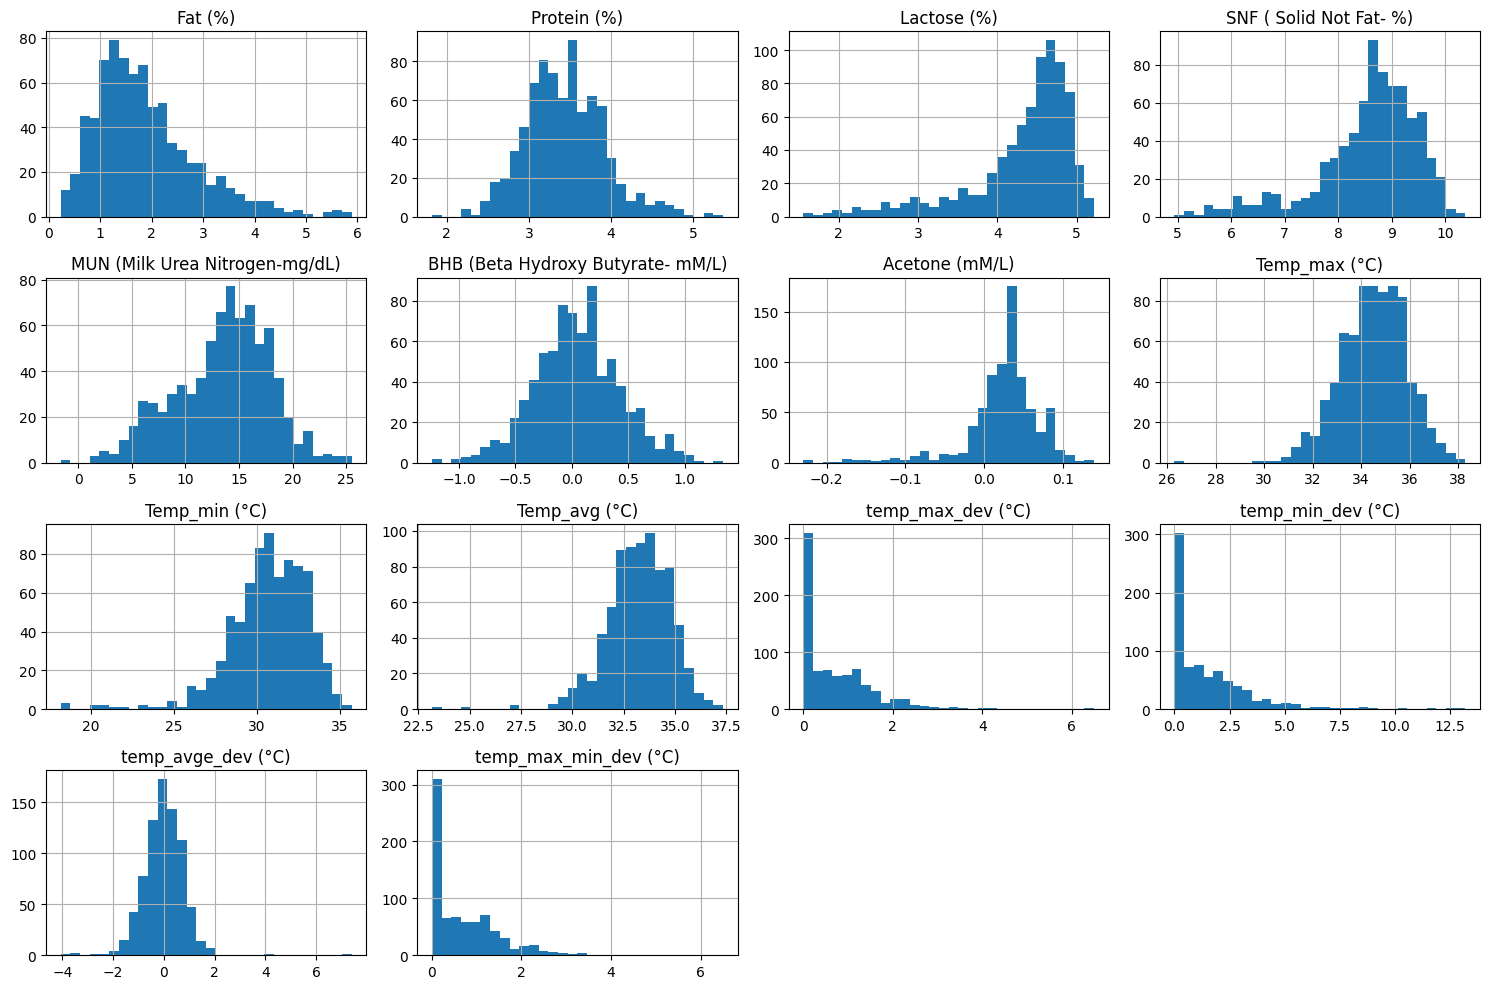

In [30]:
units = {
    'Fat': '%',
    'Protein': '%',
    'Lactose': '%',
    'SNF': ' Solid Not Fat- %',
    'MUN': 'Milk Urea Nitrogen-mg/dL',
    'BHB': 'Beta Hydroxy Butyrate- mM/L',
    'Acetone': 'mM/L',   # if different, change it
    'Temp_max': '°C',
    'Temp_min': '°C',
    'Temp_avg': '°C',
    'temp_max_dev': '°C',
    'temp_min_dev': '°C',
    'temp_avge_dev': '°C',
    'temp_max_min_dev': '°C'
}
import matplotlib.pyplot as plt

columns_to_test = [
    'Fat', 'Protein', 'Lactose', 'SNF', 'MUN',
    'BHB', 'Acetone', 'Temp_max', 'Temp_min',
    'Temp_avg', 'temp_max_dev', 'temp_min_dev',
    'temp_avge_dev', 'temp_max_min_dev'
]

axes = list_df[columns_to_test].hist(figsize=(15, 10), bins=30)
plt.tight_layout()

# Add titles with units
for ax in axes.flatten():
    column = ax.get_title()   # column name auto-set by pandas
    if column in units:
        ax.set_title(f"{column} ({units[column]})")
    else:
        ax.set_title(column)

plt.show()


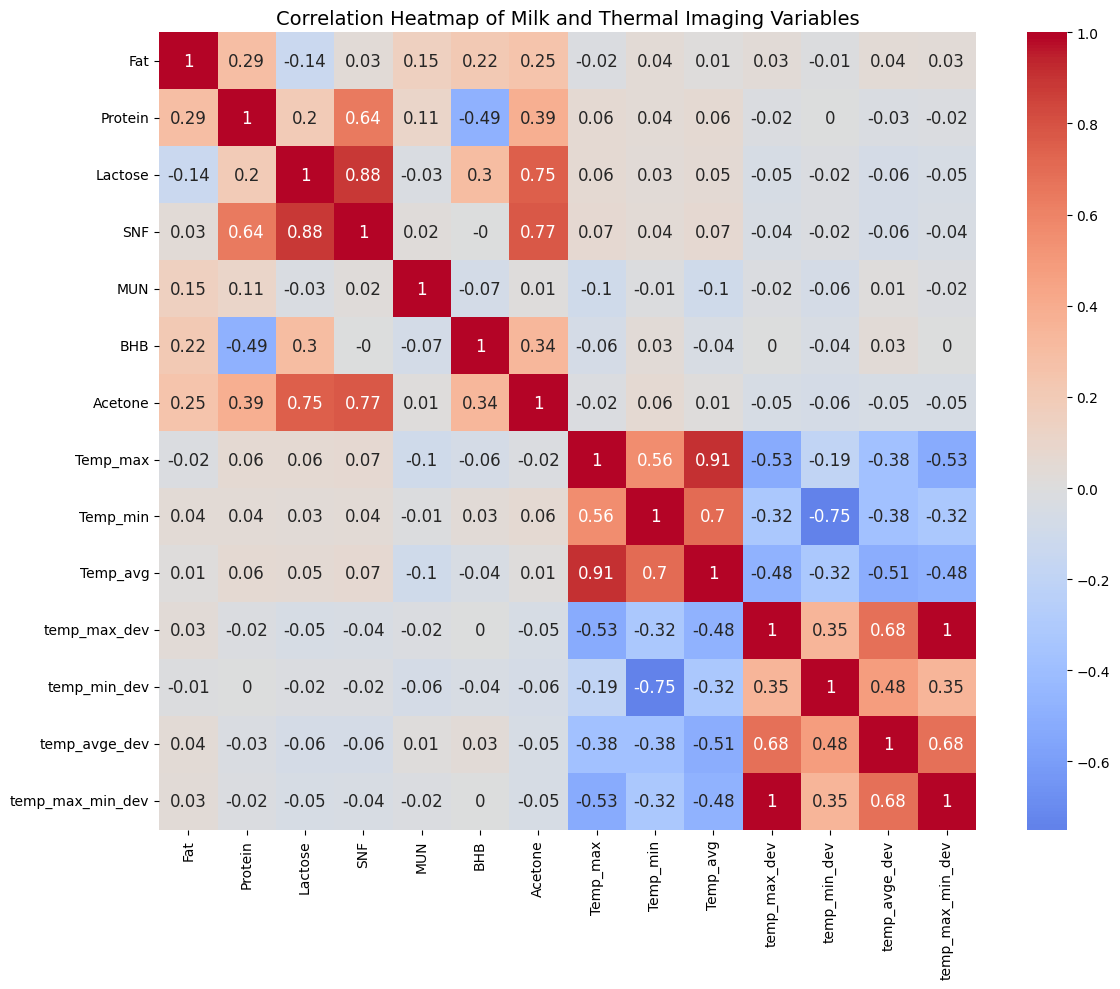

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Compute correlation matrix
corr = list_df[columns_to_test].corr().round(2)

# Set figure size (adjust width/height as needed)
plt.figure(figsize=(12, 10))  # Increase size for readability

# Plot heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0, annot_kws={"size": 12})

# Add title
plt.title('Correlation Heatmap of Milk and Thermal Imaging Variables', fontsize=14)

# Improve layout
plt.tight_layout()

# Optional: Save high-res figure
plt.savefig("correlation_heatmap.png", dpi=300)

# Show plot
plt.show()


Text(0.5, 1.0, 'Correlation Heatmap of Milk and Thermal Imaging Variables')

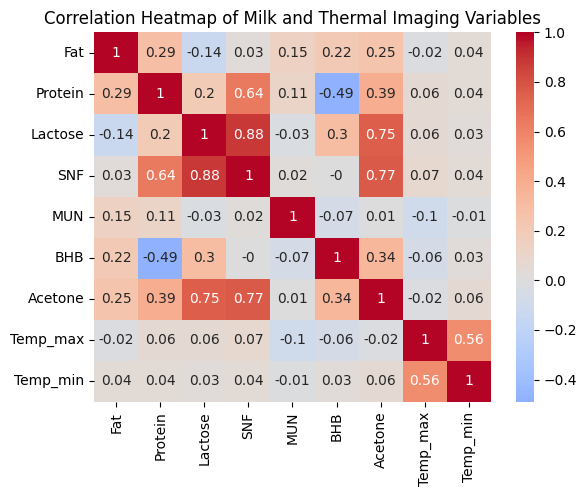

In [70]:

Milk_features = ['Fat', 'Protein', 'Lactose', 'SNF', 'MUN', 'BHB', 'Acetone']
poly_max=['Temp_max']
poly_min=['Temp_min']
used_features=['Fat', 'Protein', 'Lactose', 'SNF', 'MUN', 'BHB', 'Acetone','Temp_max','Temp_min']

used_df=df[['Fat', 'Protein', 'Lactose', 'SNF', 'MUN', 'BHB', 'Acetone','Temp_max','Temp_min']]
corr= used_df.corr().round(2)
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap of Milk and Thermal Imaging Variables')

In [1]:
used_df.hist(bins=30, figsize=(15, 10))  # Customize bins and figure size as needed
plt.tight_layout()  # Adjust layout to prevent overlapping titles

plt.show()  # Show the plot

NameError: name 'used_df' is not defined

In [5]:
df['sq_delta']= df['Maxsq']- df['Minsq']
df['poly_delta']= df['Maxsq']- df['Minsq']

In [6]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, roc_auc_score, ConfusionMatrixDisplay
)
from sklearn.model_selection import GridSearchCV, StratifiedKFold
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

# Ensure output folders exist
os.makedirs("confusion_matrices", exist_ok=True)
os.makedirs("feature_importances", exist_ok=True)

def calculate_specificity(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    TN = cm[0, 0]
    FP = cm[0, 1]
    return TN / (TN + FP) if (TN + FP) > 0 else 0

def get_results(df, target, test_features, model, param_grid, algo_name, feature_name):
    df = df.fillna(method='ffill')
    X = df[test_features]
    y = df[target]

    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    grid = GridSearchCV(model, param_grid, cv=cv, scoring='f1_weighted', n_jobs=-1)
    grid.fit(X, y)
    best_model = grid.best_estimator_

    metrics = {
        'Accuracy': [],
        'Precision': [],
        'Recall': [],
        'F1 Score': [],
        'ROC-AUC': [],
        'Specificity': []
    }

    for train_idx, test_idx in cv.split(X, y):
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

        best_model.fit(X_train, y_train)
        y_pred = best_model.predict(X_test)
        y_prob = best_model.predict_proba(X_test)[:, 1] if hasattr(best_model, "predict_proba") else None

        metrics['Accuracy'].append(accuracy_score(y_test, y_pred))
        metrics['Precision'].append(precision_score(y_test, y_pred, average='weighted', zero_division=0))
        metrics['Recall'].append(recall_score(y_test, y_pred, average='weighted', zero_division=0))
        metrics['F1 Score'].append(f1_score(y_test, y_pred, average='weighted', zero_division=0))
        if y_prob is not None and len(np.unique(y)) == 2:
            metrics['ROC-AUC'].append(roc_auc_score(y_test, y_prob))
        else:
            metrics['ROC-AUC'].append(np.nan)
        metrics['Specificity'].append(calculate_specificity(y_test, y_pred))

    # Final fit for confusion matrix and feature importance
    best_model.fit(X, y)
    y_pred_final = best_model.predict(X)

    fig, ax1 = plt.subplots(1, 1, figsize=(8, 6))
    ConfusionMatrixDisplay.from_estimator(best_model, X, y, ax=ax1, cmap="Blues")
    ax1.set_title(f'{algo_name} - {feature_name}')
    plt.tight_layout()
    plt.savefig(f"confusion_matrices/{algo_name}_{feature_name}.png")
    plt.close()

    if hasattr(best_model, 'feature_importances_'):
        important_features = pd.Series(best_model.feature_importances_, index=test_features).sort_values(ascending=False)
        plt.figure(figsize=(10, 6))
        important_features.plot(kind='bar', color='green')
        plt.title(f'Feature Importances - {algo_name} ({feature_name})')
        plt.ylabel('Importance')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.savefig(f'feature_importances/{algo_name}_{feature_name}_importance.png')
        plt.close()

    summary = {
        'Algorithm': algo_name,
        'Features Used': feature_name,
        'Best Parameters': grid.best_params_,
    }

    for k in metrics:
        mean_val = np.mean(metrics[k])
        se_val = np.std(metrics[k])
        summary[f"{k} (±SE)"] = f"{mean_val:.4f} ± {se_val:.4f}"

    return summary


# Model configs
model_configs = [
    (RandomForestClassifier(random_state=42), {
        'n_estimators': [50, 100],
        'max_depth': [None, 10, 20]
    }, 'RandomForestClassifier'),
    (LogisticRegression(max_iter=1000), {
        'C': [0.1, 1, 10],
        'solver': ['lbfgs']
    }, 'LogisticRegression'),
    (AdaBoostClassifier(random_state=42), {
        'n_estimators': [50, 100],
        'learning_rate': [0.5, 1.0]
    }, 'AdaBoostClassifier'),
    (GaussianNB(), {
        'var_smoothing': [1e-9, 1e-8, 1e-7]
    }, 'NaiveBayes')
]

Only_sq = ['Maxsq', 'Minsq', 'Avgesq', 'sq_delta']
Only_poly = ['Maxpoly', 'Minpoly', 'Avgepoly', 'poly_delta']
Milk_features = ['Fat', 'Protein', 'Lactose', 'SNF', 'MUN', 'BHB', 'Acetone']
Temp_features = Only_sq + Only_poly
all_features = Milk_features + Temp_features

list_model = [Only_sq, Only_poly, Milk_features, Temp_features, all_features]
list_model_names = ['Only_sq', 'Only_poly', 'Milk_features', 'Temp_features', 'all_features']

results = []
for model, params, model_name in model_configs:
    for features, feature_name in zip(list_model, list_model_names):
        result = get_results(df, 'subclinical', features, model, params, model_name, feature_name)
        results.append(result)

results_df = pd.DataFrame(results)
results_df.to_csv("model_metrics_summary.csv", index=False)

print("\nModel Evaluation Summary:")
print(results_df)





Model Evaluation Summary:
                 Algorithm  Features Used  \
0   RandomForestClassifier        Only_sq   
1   RandomForestClassifier      Only_poly   
2   RandomForestClassifier  Milk_features   
3   RandomForestClassifier  Temp_features   
4   RandomForestClassifier   all_features   
5       LogisticRegression        Only_sq   
6       LogisticRegression      Only_poly   
7       LogisticRegression  Milk_features   
8       LogisticRegression  Temp_features   
9       LogisticRegression   all_features   
10      AdaBoostClassifier        Only_sq   
11      AdaBoostClassifier      Only_poly   
12      AdaBoostClassifier  Milk_features   
13      AdaBoostClassifier  Temp_features   
14      AdaBoostClassifier   all_features   
15              NaiveBayes        Only_sq   
16              NaiveBayes      Only_poly   
17              NaiveBayes  Milk_features   
18              NaiveBayes  Temp_features   
19              NaiveBayes   all_features   

                           

In [ ]:
df[df]

,Algorithm,Features Used,Best Parameters,Accuracy (±SE),Precision (±SE),Recall (±SE),F1 Score (±SE),ROC-AUC (±SE),Specificity (±SE)
0,RandomForestClassifier,Only_sq,"{'max_depth': 10, 'n_estimators': 100}",0.4936 ± 0.0472,0.4936 ± 0.0471,0.4936 ± 0.0472,0.4934 ± 0.0471,0.4746 ± 0.0502,0.4773 ± 0.0432
1,RandomForestClassifier,Only_poly,"{'max_depth': 10, 'n_estimators': 100}",0.5246 ± 0.0400,0.5244 ± 0.0393,0.5246 ± 0.0400,0.5231 ± 0.0392,0.5261 ± 0.0456,0.4959 ± 0.0280
2,RandomForestClassifier,Milk_features,"{'max_depth': 10, 'n_estimators': 100}",0.7719 ± 0.0250,0.7776 ± 0.0254,0.7719 ± 0.0250,0.7712 ± 0.0252,0.8442 ± 0.0114,0.8196 ± 0.0433
3,RandomForestClassifier,Temp_features,"{'max_depth': 10, 'n_estimators': 100}",0.5155 ± 0.0453,0.5159 ± 0.0457,0.5155 ± 0.0453,0.5148 ± 0.0458,0.5188 ± 0.0468,0.5223 ± 0.0678
4,RandomForestClassifier,all_features,"{'max_depth': 10, 'n_estimators': 100}",0.7526 ± 0.0233,0.7592 ± 0.0180,0.7526 ± 0.0233,0.7514 ± 0.0244,0.8362 ± 0.0269,0.8090 ± 0.0274
5,LogisticRegression,Only_sq,"{'C': 0.1, 'solver': 'lbfgs'}",0.4937 ± 0.0559,0.4900 ± 0.0670,0.4937 ± 0.0559,0.4387 ± 0.0449,0.4466 ± 0.0528,0.1988 ± 0.0910
6,LogisticRegression,Only_poly,"{'C': 10, 'solver': 'lbfgs'}",0.4756 ± 0.0385,0.4688 ± 0.0418,0.4756 ± 0.0385,0.4476 ± 0.0286,0.4578 ± 0.0381,0.2758 ± 0.0922
7,LogisticRegression,Milk_features,"{'C': 10, 'solver': 'lbfgs'}",0.7668 ± 0.0106,0.7742 ± 0.0129,0.7668 ± 0.0106,0.7658 ± 0.0111,0.8468 ± 0.0223,0.8251 ± 0.0442
8,LogisticRegression,Temp_features,"{'C': 10, 'solver': 'lbfgs'}",0.4691 ± 0.0377,0.4635 ± 0.0413,0.4691 ± 0.0377,0.4502 ± 0.0271,0.4520 ± 0.0302,0.2995 ± 0.0667
9,LogisticRegression,all_features,"{'C': 0.1, 'solver': 'lbfgs'}",0.7616 ± 0.0168,0.7737 ± 0.0214,0.7616 ± 0.0168,0.7599 ± 0.0169,0.8382 ± 0.0291,0.8409 ± 0.0586


In [12]:
results_reg= pd.DataFrame({'MSE': MSE, 'R2':R2, 'Model_name':model_name, 'algorithm':algo_name})

In [13]:
results_reg

,MSE,R2,Model_name,algorithm
0,13.412193,-0.249655,Only_sq,RandomForestRegressor
1,13.478719,-0.255854,Only_poly,RandomForestRegressor
2,4.794190,0.553311,Milk_features,RandomForestRegressor
3,12.398519,-0.155208,Temp_features,RandomForestRegressor
4,4.783546,0.554302,all_features,RandomForestRegressor
5,11.068451,-0.031282,Only_sq,BayesianRidge
6,11.067913,-0.031232,Only_poly,BayesianRidge
7,5.805786,0.459057,Milk_features,BayesianRidge
8,11.068235,-0.031262,Temp_features,BayesianRidge
9,6.031078,0.438066,all_features,BayesianRidge


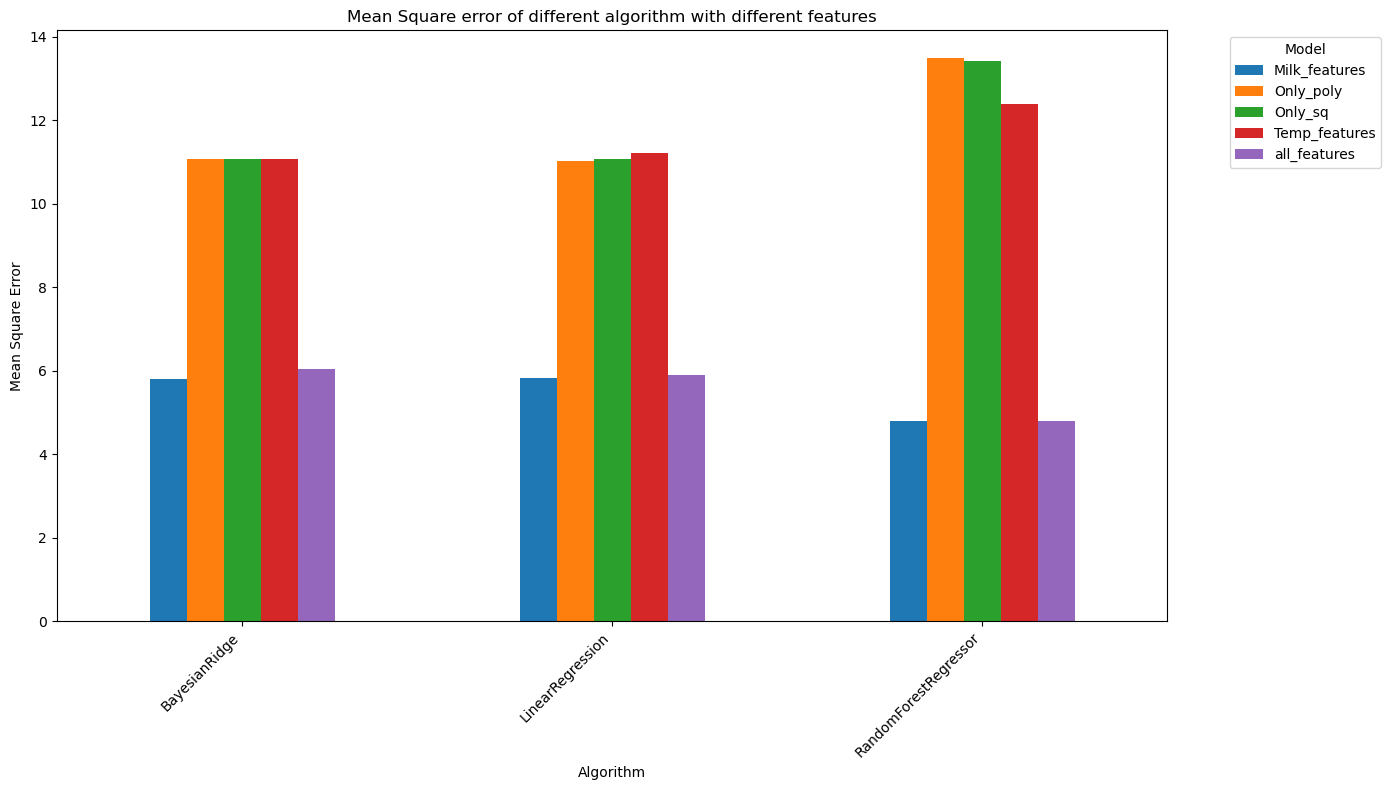

In [14]:
pivot_df_mse=results_reg.pivot(index='algorithm', columns='Model_name', values='MSE')
pivot_df_mse.plot(kind='bar', stacked=False, figsize=(14, 8))
plt.title('Mean Square error of different algorithm with different features')
plt.xlabel('Algorithm')
plt.ylabel('Mean Square Error')
plt.legend(title='Model', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()

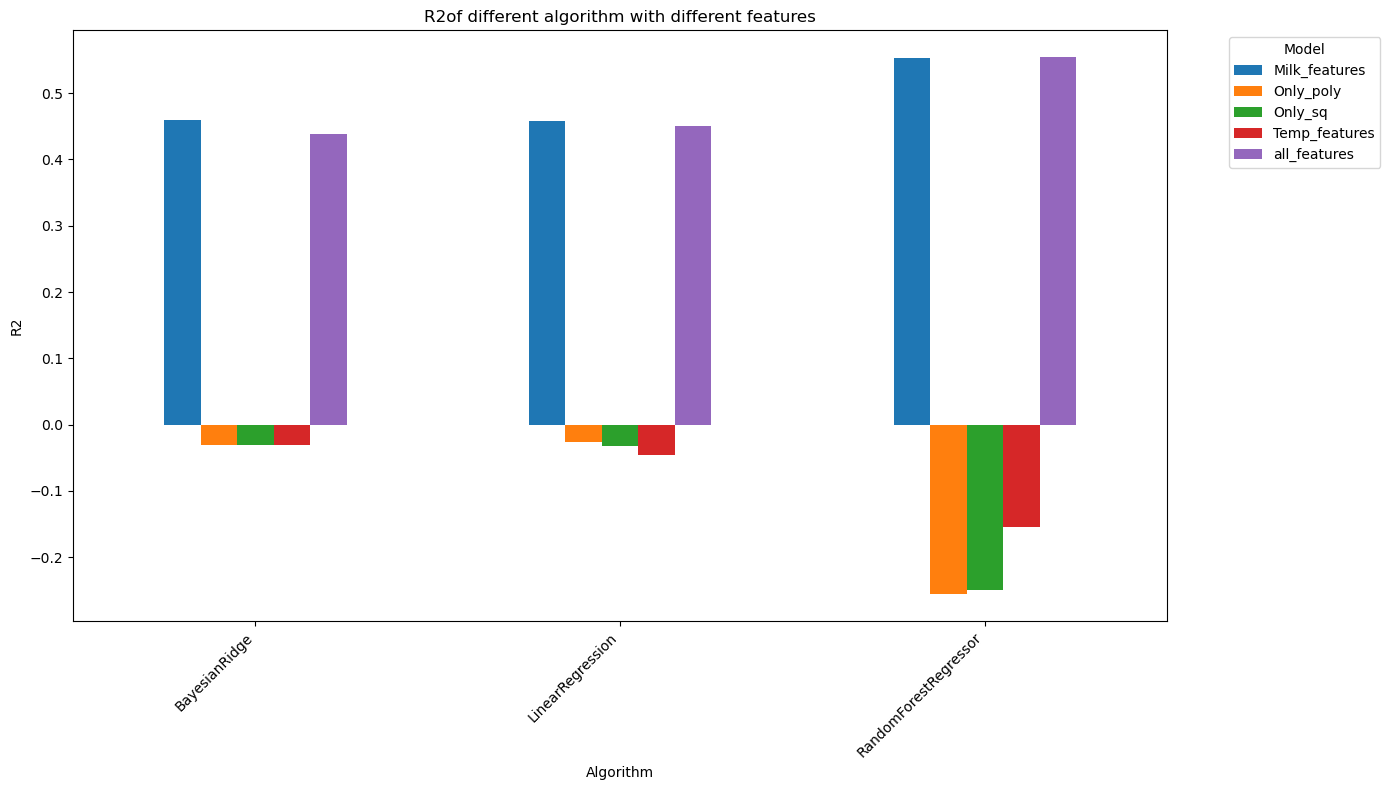

In [15]:
pivot_df_r2=results_reg.pivot(index='algorithm', columns='Model_name', values='R2')
pivot_df_r2.plot(kind='bar', stacked=False, figsize=(14, 8))
plt.title('R2of different algorithm with different features')
plt.xlabel('Algorithm')
plt.ylabel('R2')
plt.legend(title='Model', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()

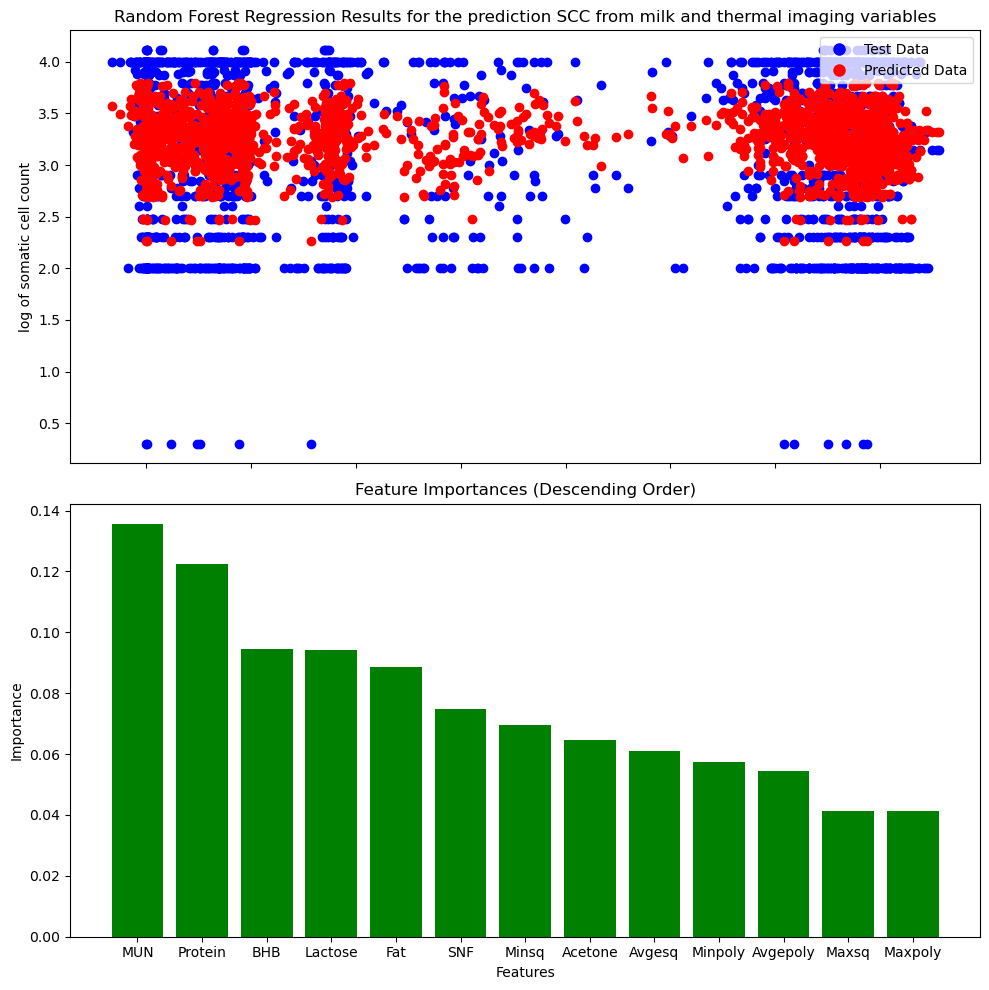

mean_squared_error is 0.44259816028688437, r squared is 0.23004030160071554, and score is 0.23004030160071554


(0.44259816028688437, 0.23004030160071554)

In [39]:
get_results(df,['logcfu'], [
       'Fat', 'Protein',
       'Lactose', 'SNF', 'MUN',  'BHB', 'Acetone', 

        'Maxsq', 'Minsq', 'Avgesq', 'Maxpoly', 'Minpoly',
       'Avgepoly'])

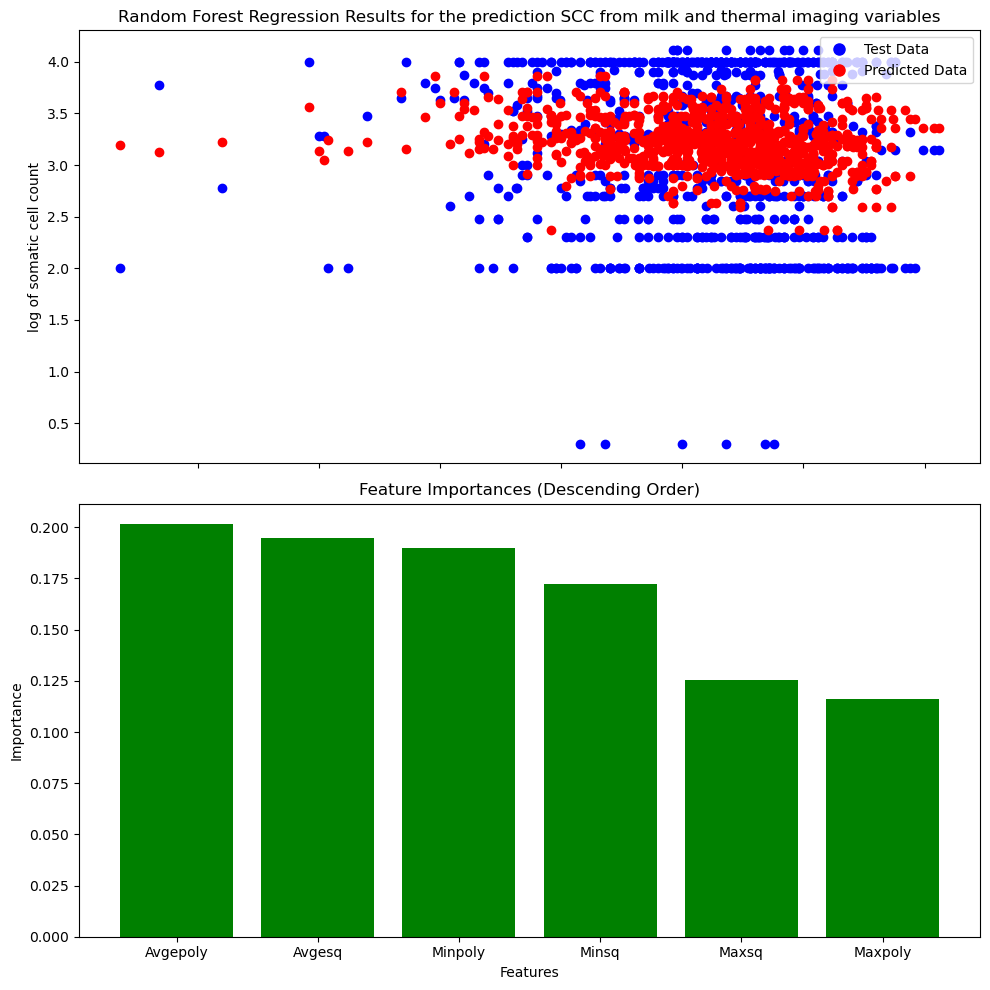

mean_squared_error is 0.5921367549293617, r squared is -0.030102422795933004, and score is -0.030102422795933004


(0.5921367549293617, -0.030102422795933004)

In [27]:
get_results(df ,['logcfu'], 
        ['Maxsq', 'Minsq', 'Avgesq', 'Maxpoly', 'Minpoly',
       'Avgepoly'])

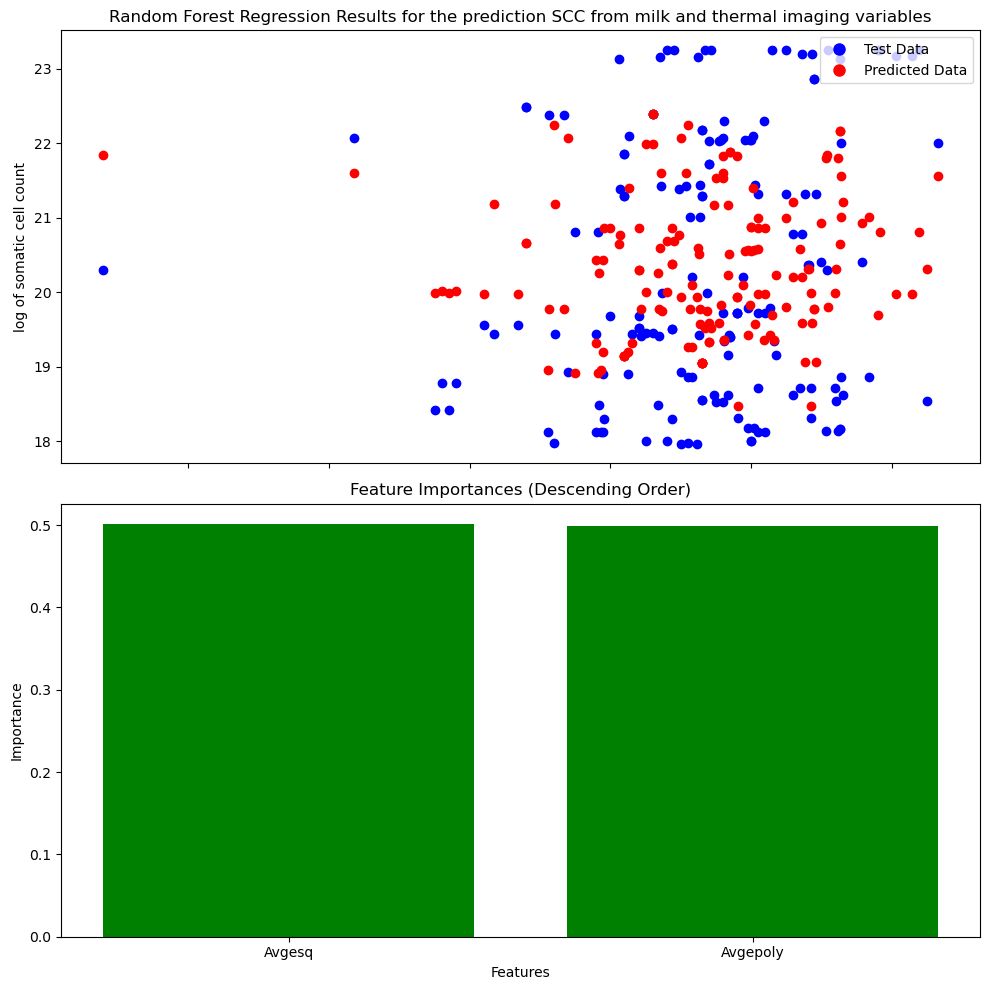

mean_squared_error is 4.3485256925253095, r squared is -0.446015877751224, and score is -0.446015877751224


(4.3485256925253095, -0.446015877751224)

In [136]:
get_results(df[df['subclinical']==1] ,['logscc'], [ 'Avgesq',
       'Avgepoly'])

Text(0.5, 1.0, 'Correlation Matrix of milk and thermal images variables')

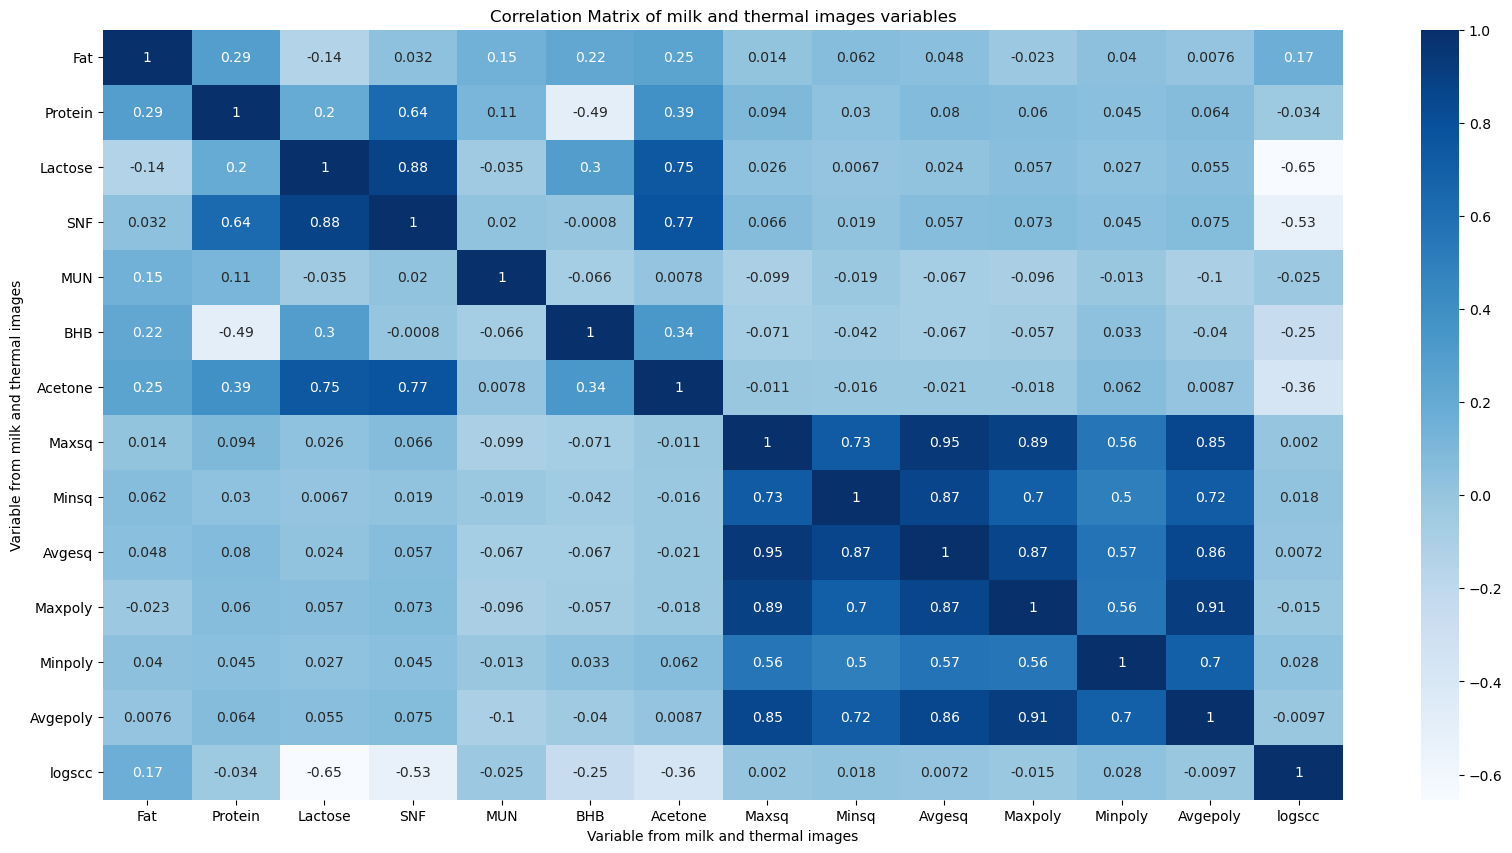

In [118]:
figure, ax = plt.subplots(figsize=(20, 10))
ax=sns.heatmap(df[['Fat', 'Protein',
       'Lactose', 'SNF', 'MUN',  'BHB', 'Acetone',
        'Maxsq', 'Minsq', 'Avgesq', 'Maxpoly', 'Minpoly',
       'Avgepoly', 'logscc']].corr(), cmap="Blues", annot=True, ax=ax)
ax.set_title('Correlation Matrix')
ax.set_xlabel('Variable from milk and thermal images')
ax.set_ylabel('Variable from milk and thermal images')
ax.set_title('Correlation Matrix of milk and thermal images variables')



In [117]:
sns.heatmap(df[['Fat', 'Protein',
       'Lactose', 'SNF', 'MUN',  'BHB', 'Acetone',
        'Maxsq', 'Minsq', 'Avgesq', 'Maxpoly', 'Minpoly',
       'Avgepoly', 'logscc']].corr(), cmap="Reds", annot=True, ax=ax)

<Axes: title={'center': 'Rain Cloud plot of Acetone level in milk to occurance of subclinical mastitis'}>

In [47]:
model=smf.glm(formula='Avgesq ~ logcfu', data=df[df['subclinical']==1]).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 Avgesq   No. Observations:                  399
Model:                            GLM   Df Residuals:                      397
Model Family:                Gaussian   Df Model:                            1
Link Function:               Identity   Scale:                          2.4668
Method:                          IRLS   Log-Likelihood:                -745.29
Date:                Thu, 04 Jan 2024   Deviance:                       979.32
Time:                        12:08:33   Pearson chi2:                     979.
No. Iterations:                     3   Pseudo R-squ. (CS):            0.02036
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     34.5704      0.398     86.838      0.000      33.790      35.351
logcfu        -0.3303      0.115     -2.864      0.004      -0.556      -0.104
==============================================================================
"""

In [69]:
model=smf.glm(formula='Maxsq ~ logcfu', data=df[df['subclinical']==1]).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Maxsq   No. Observations:                  399
Model:                            GLM   Df Residuals:                      397
Model Family:                Gaussian   Df Model:                            1
Link Function:               Identity   Scale:                          1.9488
Method:                          IRLS   Log-Likelihood:                -698.26
Date:                Thu, 04 Jan 2024   Deviance:                       773.67
Time:                        12:57:59   Pearson chi2:                     774.
No. Iterations:                     3   Pseudo R-squ. (CS):            0.01453
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     34.9891      0.354     98.884      0.000      34.296      35.683
logcfu        -0.2477      0.103     -2.416      0.016      -0.449      -0.047
==============================================================================
"""

In [71]:
model=smf.glm(formula='Minsq ~  logcfu', data=df[df['subclinical']==1]).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Minsq   No. Observations:                  399
Model:                            GLM   Df Residuals:                      397
Model Family:                Gaussian   Df Model:                            1
Link Function:               Identity   Scale:                          4.8575
Method:                          IRLS   Log-Likelihood:                -880.47
Date:                Thu, 04 Jan 2024   Deviance:                       1928.4
Time:                        12:58:47   Pearson chi2:                 1.93e+03
No. Iterations:                     3   Pseudo R-squ. (CS):            0.01558
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     33.6290      0.559     60.198      0.000      32.534      34.724
logcfu        -0.4050      0.162     -2.502      0.012      -0.722      -0.088
==============================================================================
"""

In [72]:
df.columns

Index(['Isolate_1', 'Isolate_2', 'Isolate_3', 'Isolate_4', 'Colony Count',
       'cfu/ml', 'value', 'Day', 'ID', 'Qtr', 'Treatment', 'Fat', 'Protein',
       'Lactose', 'SNF', 'MUN', 'SCC', 'BHB', 'Acetone', 'sccact', 'logscc',
       'subclinical', 'Maxsq', 'Minsq', 'Avgesq', 'Maxpoly', 'Minpoly',
       'Avgepoly', 'cohort', 'day_within_cohort', 'merged_ID', 'bac_type',
       'gram_sp', 'logcfu'],
      dtype='object')

In [73]:
df[['Lactose', 'SNF', 'MUN', 'SCC', 'BHB', 'Acetone', 'sccact', 'logscc',
       'subclinical', 'Maxsq', 'Minsq', 'Avgesq', 'Maxpoly', 'Minpoly',
       'Avgepoly', 'logcfu', 'cfu/ml']].corr()

,Lactose,SNF,MUN,SCC,BHB,Acetone,sccact,logscc,subclinical,Maxsq,Minsq,Avgesq,Maxpoly,Minpoly,Avgepoly,logcfu,cfu/ml
Lactose,1.000000,0.880458,-0.034617,-0.649458,0.298446,0.747225,-0.649458,-0.654156,-0.538052,0.026215,0.006744,0.024127,0.056563,0.027287,0.054984,-0.093188,-0.038389
SNF,0.880458,1.000000,0.020348,-0.520914,-0.000797,0.774570,-0.520914,-0.529245,-0.454806,0.066293,0.019145,0.057417,0.073233,0.044980,0.074788,0.001326,0.046582
MUN,-0.034617,0.020348,1.000000,-0.007147,-0.066353,0.007819,-0.007147,-0.025133,0.003419,-0.098716,-0.019151,-0.067173,-0.095982,-0.012843,-0.101694,0.078992,-0.002274
SCC,-0.649458,-0.520914,-0.007147,1.000000,-0.282837,-0.454705,1.000000,0.706435,0.493184,0.022276,0.043058,0.029303,-0.007482,0.006554,0.009003,0.061411,0.045287
BHB,0.298446,-0.000797,-0.066353,-0.282837,1.000000,0.335222,-0.282837,-0.254947,-0.186790,-0.070581,-0.042071,-0.067454,-0.056656,0.033089,-0.040090,-0.116958,-0.124144
Acetone,0.747225,0.774570,0.007819,-0.454705,0.335222,1.000000,-0.454705,-0.364693,-0.303576,-0.011320,-0.015726,-0.020745,-0.017787,0.062386,0.008670,0.043346,0.042286
sccact,-0.649458,-0.520914,-0.007147,1.000000,-0.282837,-0.454705,1.000000,0.706435,0.493184,0.022276,0.043058,0.029303,-0.007482,0.006554,0.009003,0.061411,0.045287
logscc,-0.654156,-0.529245,-0.025133,0.706435,-0.254947,-0.364693,0.706435,1.000000,0.809597,0.002012,0.018404,0.007157,-0.015197,0.028289,-0.009716,0.155322,0.117431
subclinical,-0.538052,-0.454806,0.003419,0.493184,-0.186790,-0.303576,0.493184,0.809597,1.000000,-0.027500,-0.016583,-0.028790,-0.031514,-0.020701,-0.046013,0.190029,0.136618
Maxsq,0.026215,0.066293,-0.098716,0.022276,-0.070581,-0.011320,0.022276,0.002012,-0.027500,1.000000,0.725775,0.947002,0.891802,0.556902,0.851632,-0.084725,-0.025951


In [16]:
df['logscc'].describe()

count    776.000000
mean      17.807113
std        3.152658
min        9.965784
25%       15.489346
50%       18.015592
75%       19.923246
max       23.253352
Name: logscc, dtype: float64

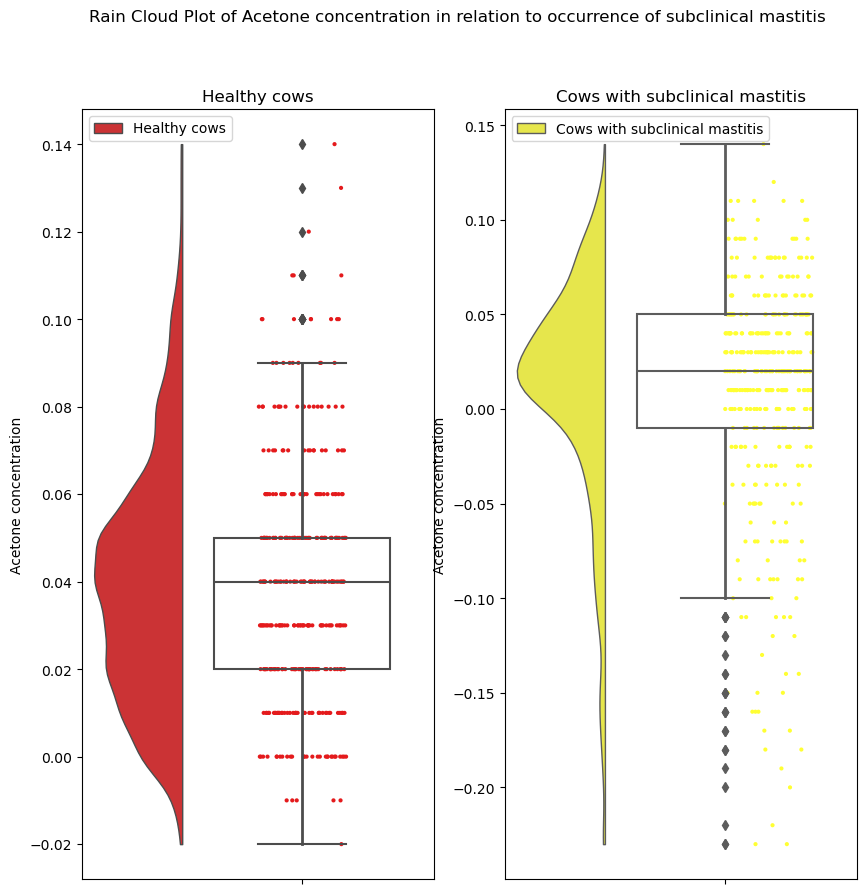

In [34]:
pal = sns.color_palette("Set1", n_colors=10)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 10))  # Adjusted to create two subplots side by side

# Healthy cows
pt.RainCloud(x='subclinical', y='Acetone', data=df[df['subclinical'] == 0], 
             width_viol=.4, width_box=.4, orient='v', palette=[pal[9]], ax=ax1, label='Healthy cows')

# Cows with subclinical mastitis
pt.RainCloud(x='subclinical', y='Acetone', data=df[df['subclinical'] == 1], 
             width_viol=.4, width_box=.4, orient='v', palette=[pal[5]], ax=ax2, move=0.1, label='Cows with subclinical mastitis')

# Adjustments
ax1.set_ylabel('Acetone concentration')
ax1.set_xlabel('')
ax1.set_xticklabels([])
ax1.legend(loc='upper left')
ax1.set_title('Healthy cows')

ax2.set_ylabel('Acetone concentration')
ax2.set_xlabel('')
ax2.set_xticklabels([])
ax2.legend(loc='upper left')
ax2.set_title('Cows with subclinical mastitis')

fig.suptitle('Rain Cloud Plot of Acetone concentration in relation to occurrence of subclinical mastitis')

plt.show()

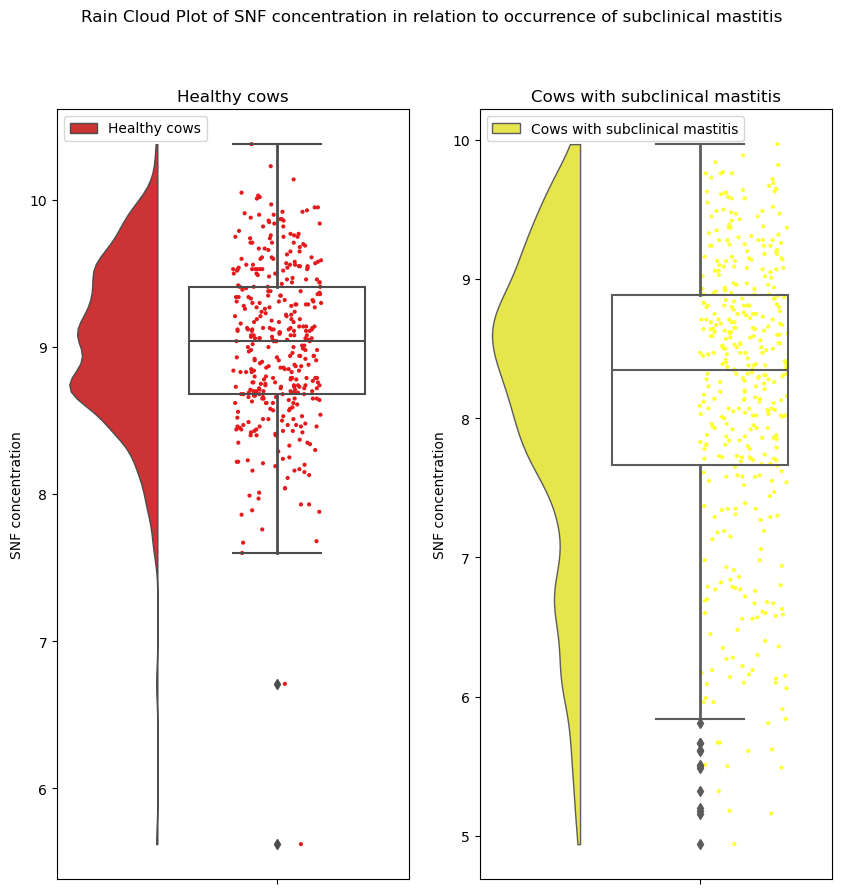

In [33]:
pal = sns.color_palette("Set1", n_colors=10)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 10))  # Adjusted to create two subplots side by side

# Healthy cows
pt.RainCloud(x='subclinical', y='SNF', data=df[df['subclinical'] == 0], 
             width_viol=.4, width_box=.4, orient='v', palette=[pal[9]], ax=ax1, label='Healthy cows')

# Cows with subclinical mastitis
pt.RainCloud(x='subclinical', y='SNF', data=df[df['subclinical'] == 1], 
             width_viol=.4, width_box=.4, orient='v', palette=[pal[5]], ax=ax2, move=0.1, label='Cows with subclinical mastitis')

# Adjustments
ax1.set_ylabel('SNF concentration')
ax1.set_xlabel('')
ax1.set_xticklabels([])
ax1.legend(loc='upper left')
ax1.set_title('Healthy cows')

ax2.set_ylabel('SNF concentration')
ax2.set_xlabel('')
ax2.set_xticklabels([])
ax2.legend(loc='upper left')
ax2.set_title('Cows with subclinical mastitis')

fig.suptitle('Rain Cloud Plot of SNF concentration in relation to occurrence of subclinical mastitis')

plt.show()

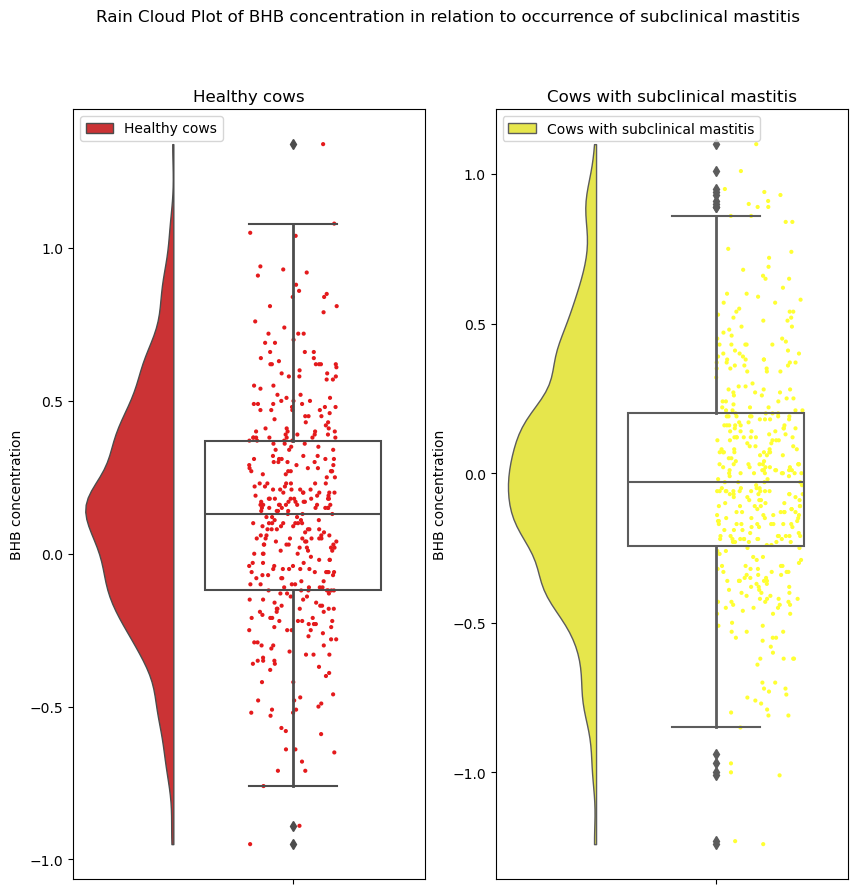

In [35]:
pal = sns.color_palette("Set1", n_colors=10)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 10))  # Adjusted to create two subplots side by side

# Healthy cows
pt.RainCloud(x='subclinical', y='BHB', data=df[df['subclinical'] == 0], 
             width_viol=.4, width_box=.4, orient='v', palette=[pal[9]], ax=ax1, label='Healthy cows')

# Cows with subclinical mastitis
pt.RainCloud(x='subclinical', y='BHB', data=df[df['subclinical'] == 1], 
             width_viol=.4, width_box=.4, orient='v', palette=[pal[5]], ax=ax2, move=0.1, label='Cows with subclinical mastitis')

# Adjustments
ax1.set_ylabel('BHB concentration')
ax1.set_xlabel('')
ax1.set_xticklabels([])
ax1.legend(loc='upper left')
ax1.set_title('Healthy cows')

ax2.set_ylabel('BHB concentration')
ax2.set_xlabel('')
ax2.set_xticklabels([])
ax2.legend(loc='upper left')
ax2.set_title('Cows with subclinical mastitis')

fig.suptitle('Rain Cloud Plot of BHB concentration in relation to occurrence of subclinical mastitis')

plt.show()

In [36]:
df.columns

Index(['Isolate_1', 'Isolate_2', 'Isolate_3', 'Isolate_4', 'Colony Count',
       'cfu/ml', 'value', 'Day', 'ID', 'Qtr', 'Treatment', 'Fat', 'Protein',
       'Lactose', 'SNF', 'MUN', 'SCC', 'BHB', 'Acetone', 'sccact', 'logscc',
       'subclinical', 'Maxsq', 'Minsq', 'Avgesq', 'Maxpoly', 'Minpoly',
       'Avgepoly', 'cohort', 'day_within_cohort', 'merged_ID', 'bac_type',
       'gram_sp', 'logcfu'],
      dtype='object')

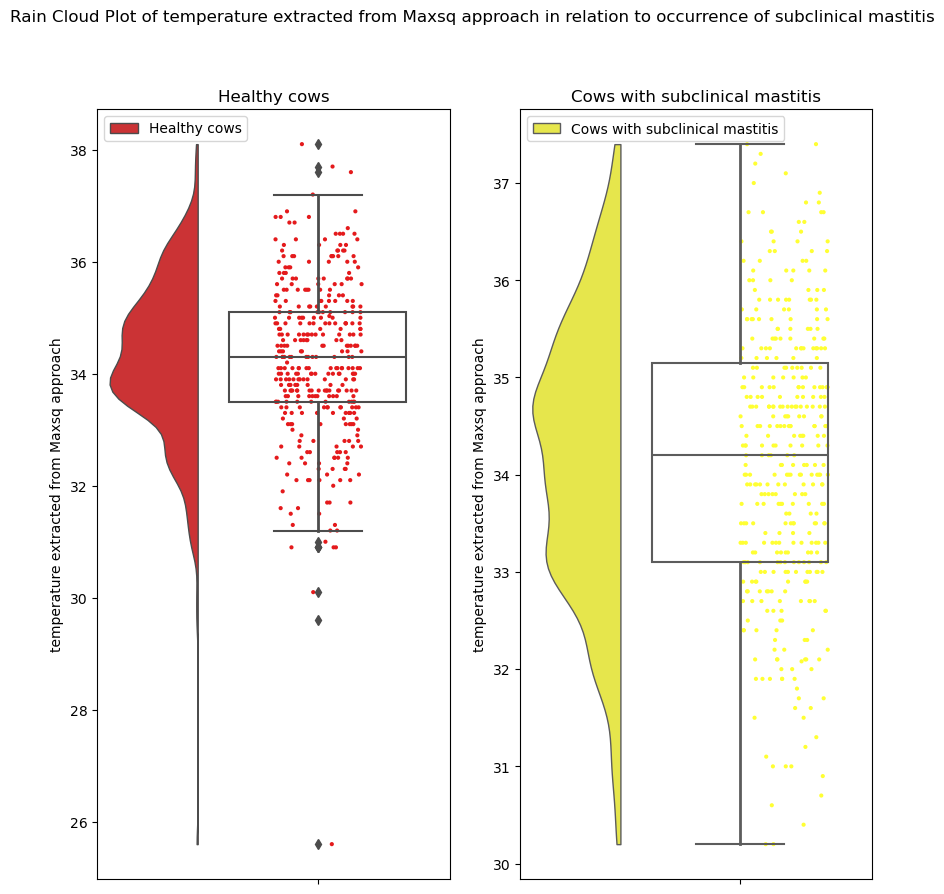

In [38]:
pal = sns.color_palette("Set1", n_colors=10)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 10))  # Adjusted to create two subplots side by side

# Healthy cows
pt.RainCloud(x='subclinical', y='Maxsq', data=df[df['subclinical'] == 0], 
             width_viol=.4, width_box=.4, orient='v', palette=[pal[9]], ax=ax1, label='Healthy cows')

# Cows with subclinical mastitis
pt.RainCloud(x='subclinical', y='Maxsq', data=df[df['subclinical'] == 1], 
             width_viol=.4, width_box=.4, orient='v', palette=[pal[5]], ax=ax2, move=0.1, label='Cows with subclinical mastitis')

# Adjustments
ax1.set_ylabel('temperature extracted from Maxsq approach')
ax1.set_xlabel('')
ax1.set_xticklabels([])
ax1.legend(loc='upper left')
ax1.set_title('Healthy cows')

ax2.set_ylabel('temperature extracted from Maxsq approach')
ax2.set_xlabel('')
ax2.set_xticklabels([])
ax2.legend(loc='upper left')
ax2.set_title('Cows with subclinical mastitis')

fig.suptitle('Rain Cloud Plot of temperature extracted from Maxsq approach in relation to occurrence of subclinical mastitis')

plt.show()

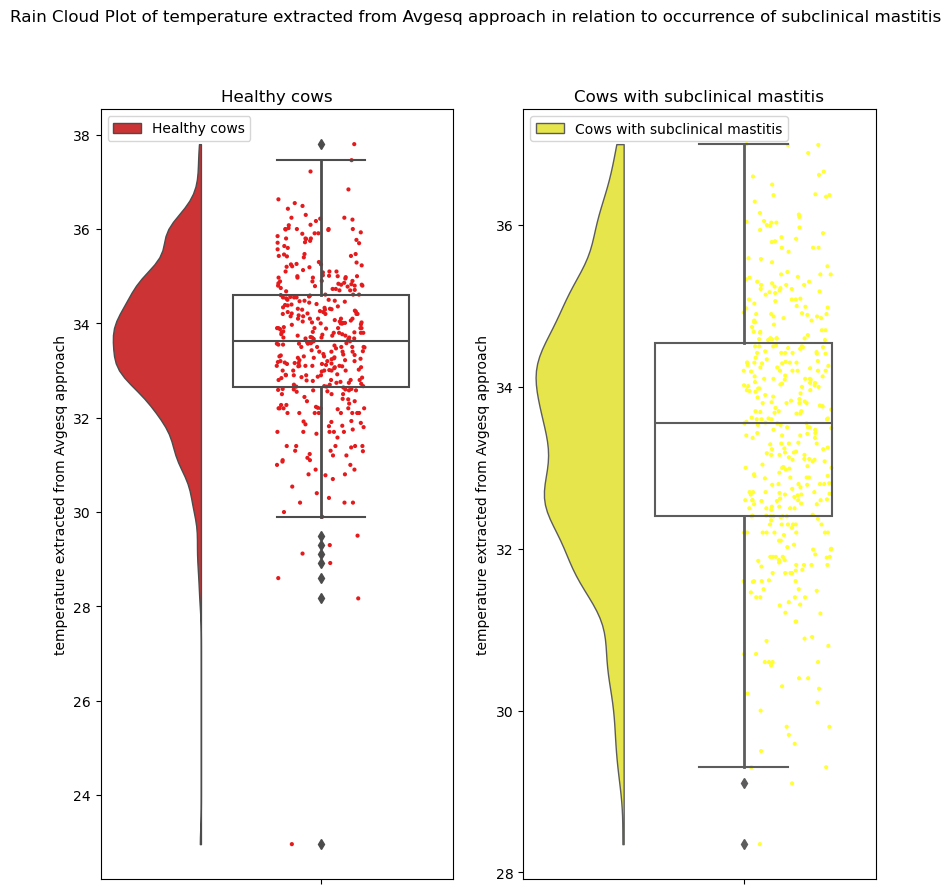

In [39]:
pal = sns.color_palette("Set1", n_colors=10)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 10))  # Adjusted to create two subplots side by side

# Healthy cows
pt.RainCloud(x='subclinical', y='Avgesq', data=df[df['subclinical'] == 0], 
             width_viol=.4, width_box=.4, orient='v', palette=[pal[9]], ax=ax1, label='Healthy cows')

# Cows with subclinical mastitis
pt.RainCloud(x='subclinical', y='Avgesq', data=df[df['subclinical'] == 1], 
             width_viol=.4, width_box=.4, orient='v', palette=[pal[5]], ax=ax2, move=0.1, label='Cows with subclinical mastitis')

# Adjustments
ax1.set_ylabel('temperature extracted from Avgesq approach')
ax1.set_xlabel('')
ax1.set_xticklabels([])
ax1.legend(loc='upper left')
ax1.set_title('Healthy cows')

ax2.set_ylabel('temperature extracted from Avgesq approach')
ax2.set_xlabel('')
ax2.set_xticklabels([])
ax2.legend(loc='upper left')
ax2.set_title('Cows with subclinical mastitis')

fig.suptitle('Rain Cloud Plot of temperature extracted from Avgesq approach in relation to occurrence of subclinical mastitis')

plt.show()

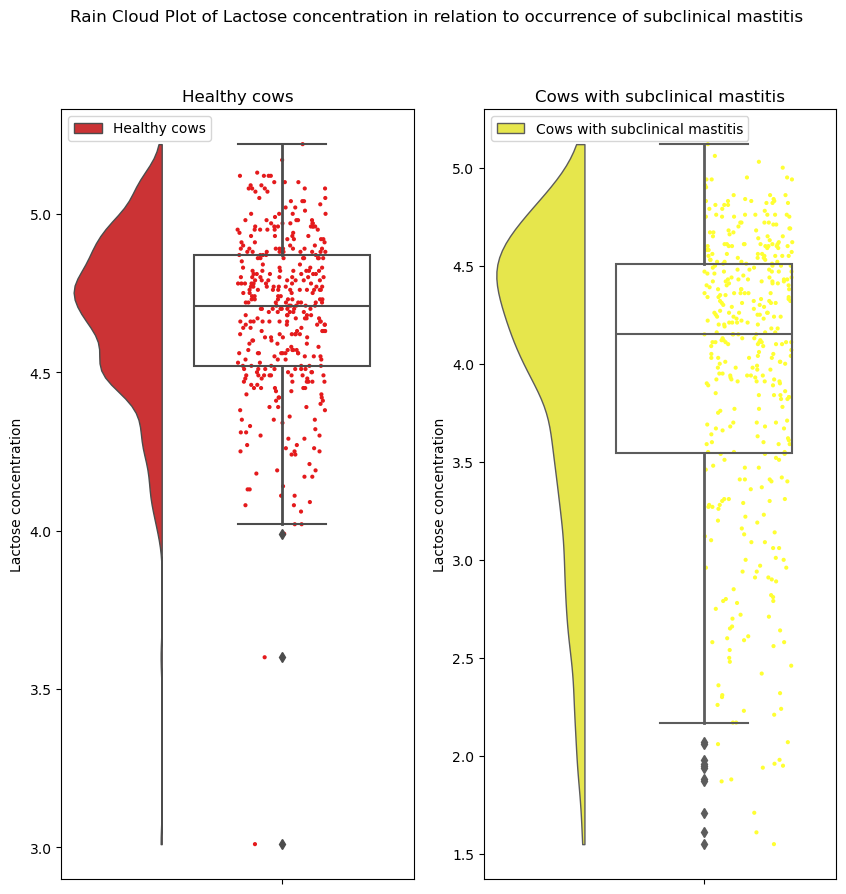

In [30]:
pal = sns.color_palette("Set1", n_colors=10)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 10))  # Adjusted to create two subplots side by side

# Healthy cows
pt.RainCloud(x='subclinical', y='Lactose', data=df[df['subclinical'] == 0], 
             width_viol=.4, width_box=.4, orient='v', palette=[pal[9]], ax=ax1, label='Healthy cows')

# Cows with subclinical mastitis
pt.RainCloud(x='subclinical', y='Lactose', data=df[df['subclinical'] == 1], 
             width_viol=.4, width_box=.4, orient='v', palette=[pal[5]], ax=ax2, move=0.1, label='Cows with subclinical mastitis')

# Adjustments
ax1.set_ylabel('Lactose concentration')
ax1.set_xlabel('')
ax1.set_xticklabels([])
ax1.legend(loc='upper left')
ax1.set_title('Healthy cows')

ax2.set_ylabel('Lactose concentration')
ax2.set_xlabel('')
ax2.set_xticklabels([])
ax2.legend(loc='upper left')
ax2.set_title('Cows with subclinical mastitis')

fig.suptitle('Rain Cloud Plot of Lactose concentration in relation to occurrence of subclinical mastitis')

plt.show()

Text(0.5, 0.98, 'Rain Cloud plot of Average temperature from square approach in degrees Celsius to occurance of subclinical mastitis')

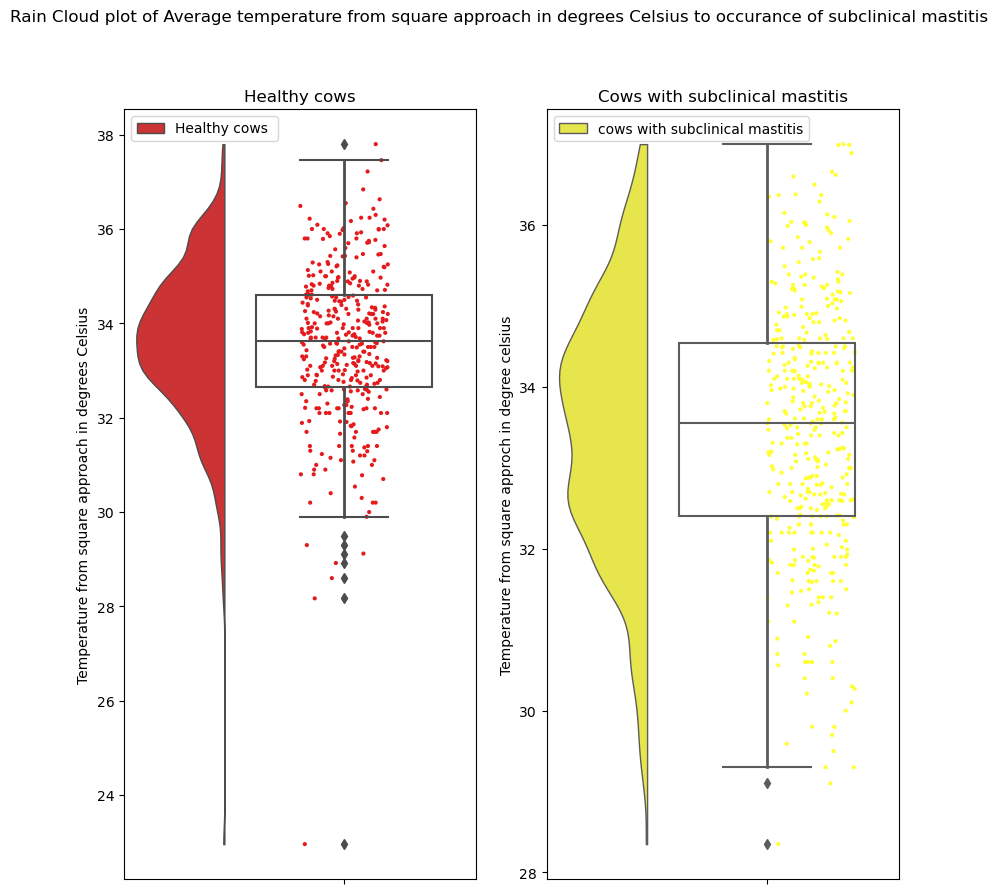

In [32]:
pal = sns.color_palette("Set1", n_colors=10)
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(10, 10))
ax=pt.RainCloud( x='subclinical', y='Avgesq', data= df[df['subclinical']==0], width_viol=.4, width_box=.4, 
                 orient= 'v',palette=[pal[9]], ax=ax1, label='Healthy cows ')

ax=pt.RainCloud(x='subclinical', y='Avgesq', data= df[df['subclinical']==1], width_viol=.4, width_box=.4, 
                 orient= 'v',palette=[pal[5]], ax=ax2, move = 0.1, label= 'cows with subclinical mastitis') 
ax1.set_ylabel('Temperature from square approach in degrees Celsius')   
ax1.set_xlabel('')
ax1.set_xticklabels([])
ax1.legend( loc='upper left')
ax1.set_title('Healthy cows')

ax2.set_ylabel('Temperature from square approch in degree celsius')
ax2.set_xlabel('')
ax2.set_xticklabels([])
ax2.legend(loc='upper left')
ax2.set_title('Cows with subclinical mastitis')

fig.suptitle('Rain Cloud plot of Average temperature from square approach in degrees Celsius to occurance of subclinical mastitis') 

In [43]:
from numpy import real_if_close
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression

def get_classification_results(df, classifier , target, test_features):
    df = df.fillna(method='ffill')
    X = df[test_features]
    y = df[target]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)

    # Calculate evaluation metrics
    confusion_mat = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)



    return confusion_mat, accuracy, precision, recall, f1


In [41]:



Only_sq= ['Maxsq', 'Minsq', 'Avgesq']
Only_poly=['Maxpoly', 'Minpoly','Avgepoly']

Milk_features=['Fat', 'Protein','Lactose', 'SNF', 'MUN',  'BHB', 'Acetone']

Temp_features= ['Maxsq', 'Minsq','Avgesq','Maxpoly', 'Minpoly','Avgepoly']

all_features=['Fat', 'Protein','Lactose', 'SNF', 'MUN',  'BHB', 'Acetone', 'Maxsq', 'Minsq','Avgesq','Maxpoly', 'Minpoly','Avgepoly']
list_model=[Only_sq, Only_poly, Milk_features, Temp_features, all_features]
list_model_names=['Only_sq', 'Only_poly', 'Milk_features', 'Temp_features', 'all_features']

In [34]:
list_model

[['Maxsq', 'Minsq', 'Avgesq'],
 ['Maxpoly', 'Minpoly', 'Avgepoly'],
 ['Fat', 'Protein', 'Lactose', 'SNF', 'MUN', 'BHB', 'Acetone'],
 ['Maxsq', 'Minsq', 'Avgesq', 'Maxpoly', 'Minpoly', 'Avgepoly'],
 ['Fat',
  'Protein',
  'Lactose',
  'SNF',
  'MUN',
  'BHB',
  'Acetone',
  'Maxsq',
  'Minsq',
  'Avgesq',
  'Maxpoly',
  'Minpoly',
  'Avgepoly']]

In [44]:
list_model=[Only_sq, Only_poly, Milk_features, Temp_features, all_features]
algo_classification=[RandomForestClassifier(), GaussianNB(), LogisticRegression()]

Accuracy=[]
Precision=[]
Recall=[]
F1=[]
model_name=[]
algo_name_classification=[]
for i , j in zip(list_model, list_model_names):
    for k in algo_classification:
        confusion_mat, accuracy, precision, recall, f1= get_classification_results(df,k, ['subclinical'], i)
        Accuracy.append(accuracy)
        Precision.append(precision)
        Recall.append(recall)
        F1.append(f1)
        model_name.append(j)
        algo_name_classification.append(str(k))

        


    




In [46]:
results_df= pd.DataFrame({'Accuracy':Accuracy, 'Precision':Precision, 'Recall': Recall, 'F1': F1, 'Model_name':model_name, 'algo_name':algo_name_classification})

In [47]:
results_df

,Accuracy,Precision,Recall,F1,Model_name,algo_name
0,0.467949,0.433333,0.549296,0.484472,Only_sq,RandomForestClassifier()
1,0.512821,0.480620,0.873239,0.620000,Only_sq,GaussianNB()
2,0.461538,0.458065,1.000000,0.628319,Only_sq,LogisticRegression()
3,0.455128,0.428571,0.591549,0.497041,Only_poly,RandomForestClassifier()
4,0.500000,0.469027,0.746479,0.576087,Only_poly,GaussianNB()
5,0.493590,0.471014,0.915493,0.622010,Only_poly,LogisticRegression()
6,0.801282,0.756410,0.830986,0.791946,Milk_features,RandomForestClassifier()
7,0.769231,0.872340,0.577465,0.694915,Milk_features,GaussianNB()
8,0.814103,0.818182,0.760563,0.788321,Milk_features,LogisticRegression()
9,0.512821,0.473684,0.633803,0.542169,Temp_features,RandomForestClassifier()


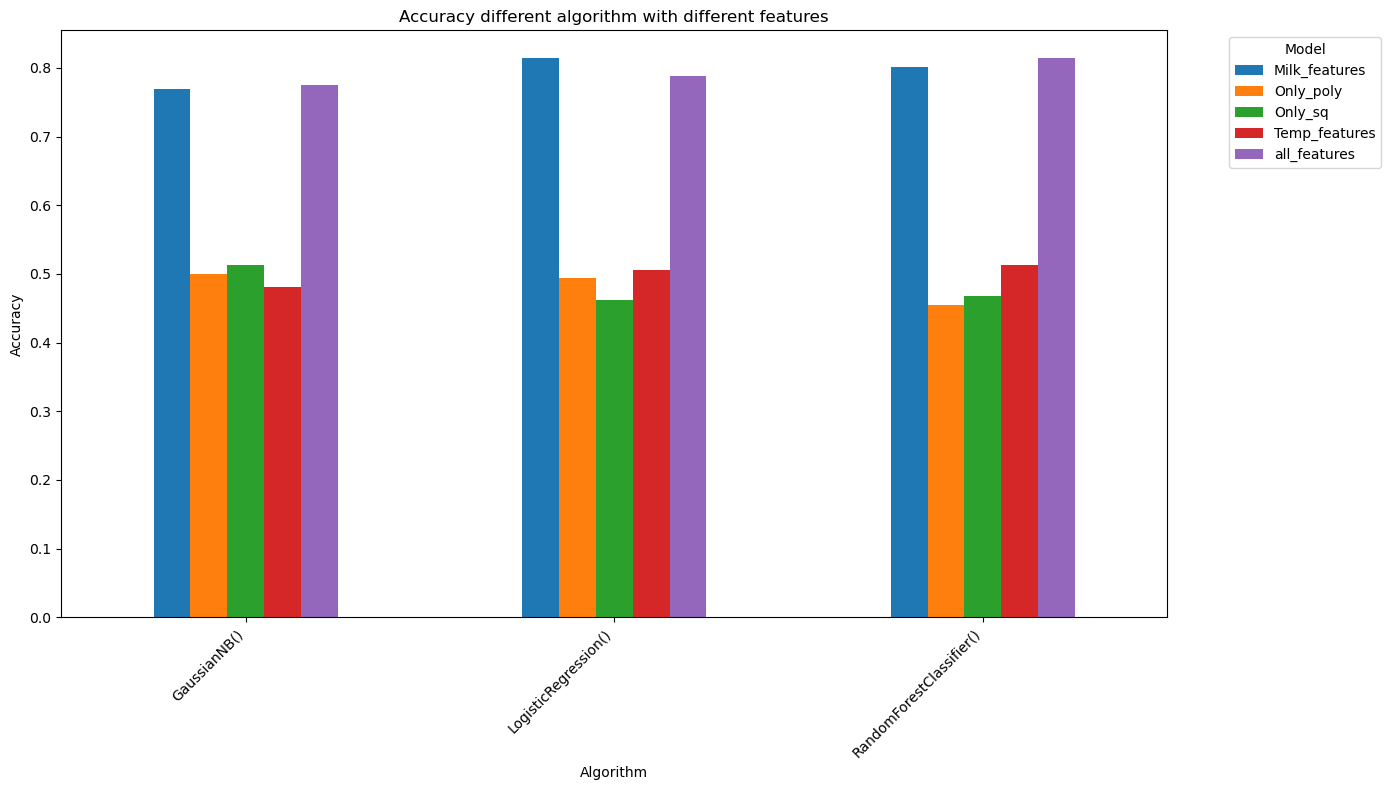

In [58]:
pivot_df_classification_accuracy= results_df.pivot(index='algo_name', columns='Model_name', values='Accuracy')
pivot_df_classification_accuracy.plot(kind='bar', stacked=False, figsize=(14, 8))
plt.title('Accuracy different algorithm with different features')
plt.xlabel('Algorithm')
plt.ylabel('Accuracy')
plt.legend(title='Model', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()

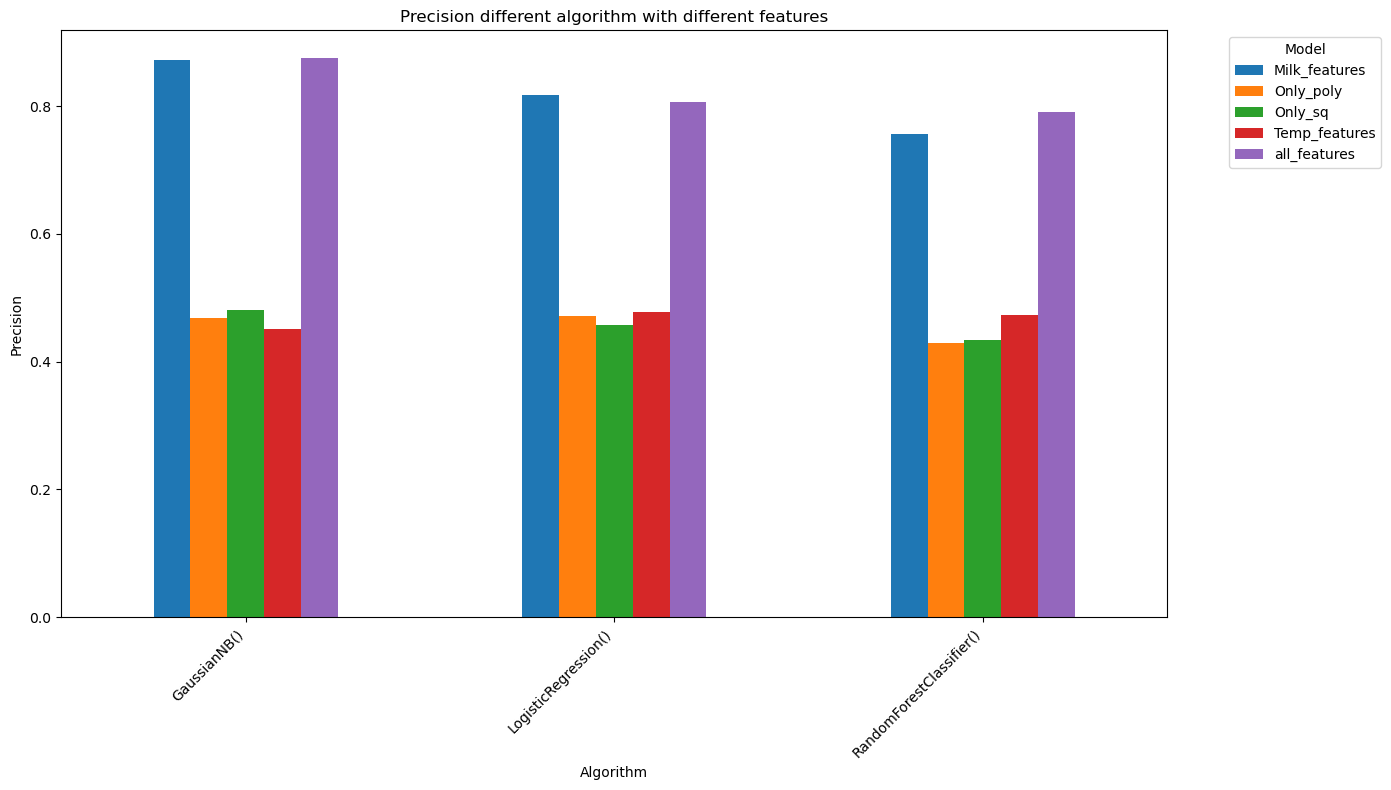

In [59]:
pivot_df_classification_accuracy= results_df.pivot(index='algo_name', columns='Model_name', values='Precision')
pivot_df_classification_accuracy.plot(kind='bar', stacked=False, figsize=(14, 8))
plt.title('Precision different algorithm with different features')
plt.xlabel('Algorithm')
plt.ylabel('Precision')
plt.legend(title='Model', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()

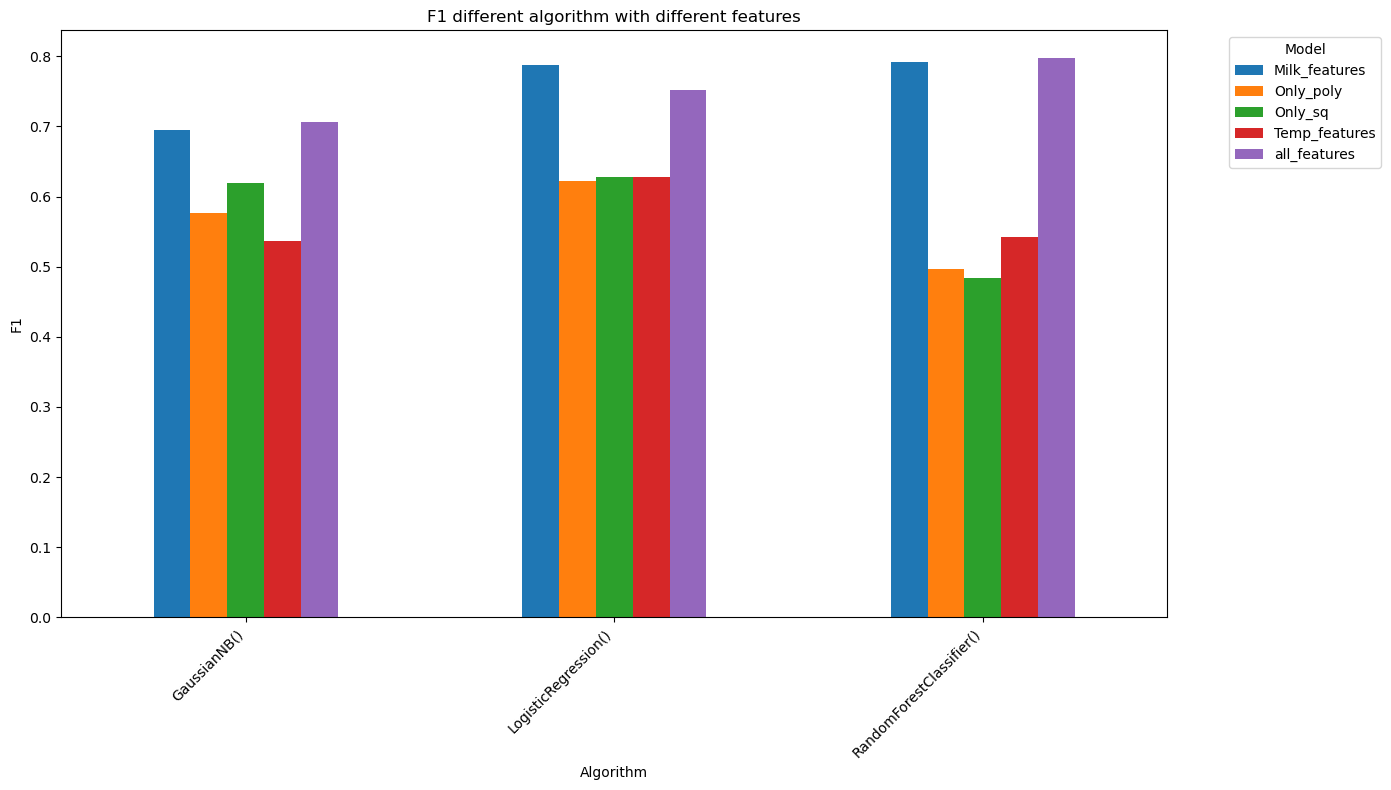

In [60]:
pivot_df_classification_accuracy= results_df.pivot(index='algo_name', columns='Model_name', values='F1')
pivot_df_classification_accuracy.plot(kind='bar', stacked=False, figsize=(14, 8))
plt.title('F1 different algorithm with different features')
plt.xlabel('Algorithm')
plt.ylabel('F1')
plt.legend(title='Model', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()

In [82]:
results_df.rename(index=dict(zip(results_df.index, list_model )))

,Accuracy,Precision,Recall,F1
"[Maxsq, Minsq, Avgesq]",0.467949,0.431818,0.535211,0.477987
"[Maxpoly, Minpoly, Avgepoly]",0.423077,0.397849,0.521127,0.451220
"[Fat, Protein, Lactose, SNF, MUN, BHB, Acetone]",0.807692,0.788732,0.788732,0.788732
"[Maxsq, Minsq, Avgesq, Maxpoly, Minpoly, Avgepoly]",0.500000,0.463158,0.619718,0.530120
"[Fat, Protein, Lactose, SNF, MUN, BHB, Acetone, Maxsq, Minsq, Avgesq, Maxpoly, Minpoly, Avgepoly]",0.756410,0.714286,0.774648,0.743243


In [49]:
pivot_df_classification

Accuracy                                    \
Model_name               Milk_features Only_poly   Only_sq Temp_features   
algo_name                                                                  
GaussianNB()                  0.769231  0.500000  0.512821      0.480769   
LogisticRegression()          0.814103  0.493590  0.461538      0.506410   
RandomForestClassifier()      0.801282  0.455128  0.467949      0.512821   

                                          Precision                      \
Model_name               all_features Milk_features Only_poly   Only_sq   
algo_name                                                                 
GaussianNB()                 0.775641      0.872340  0.469027  0.480620   
LogisticRegression()         0.788462      0.818182  0.471014  0.458065   
RandomForestClassifier()     0.814103      0.756410  0.428571  0.433333   

                                                     
Model_name               Temp_features all_features  
algo_name                                            
GaussianNB()                  0.451923     0.875000  
LogisticRegression()          0.477941     0.806452  
RandomForestClassifier()      0.473684     0.791667

AttributeError: Line2D.set() got an unexpected keyword argument 'type'

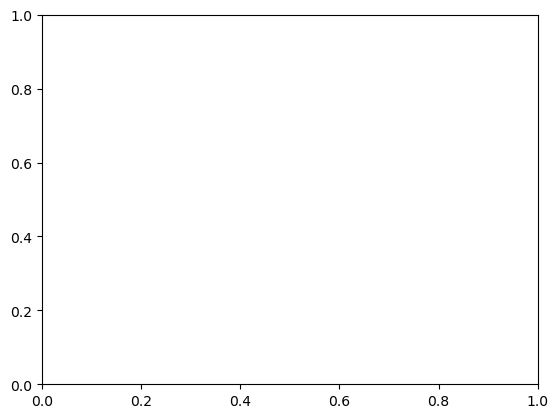

In [52]:
pivot_df_classification.plot(type='bar')